# Library

In [21]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.python.keras.layers import Dense, LSTM, Dropout
from tensorflow.python.keras import Sequential
from math import sqrt;
import tensorflow as tf

# Preprocessing

## Import data

In [2]:
url = "https://drive.google.com/file/d/1u95FUEFI29NV-LmdCRHzRwj-t4tWH87m/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil coal-derived gas  \
time                                                            
2015-01-01 00:00:00+01:00                                 0.0   
2015-01-01 01:00:00+01:00                                 0.0   
2015-01-01 02:00:00+01:00                                 0.0   
2015-01-01 03:00:00+01:00                                 0.0   
2015-01-01 04:00:00+01:00                                 0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  generation fossil oil shale  \
time                                                                            
2015-01-01 00:00:00+01:00                  162.0                          0.0   
2015-01-01 01:00:00+01:00                  158.0                          0.0   
2015-01-01 02:00:00+01:00                  157.0                          0.0   
2015-01-01 03:00:00+01:00                  160.0                          0.0   
2015-01-01 04:00:00+01:00                  156.0                          0.0   

                           generation fossil peat  generation geothermal  \
time                                                                       
2015-01-01 00:00:00+01:00                     0.0                    0.0   
2015-01-01 01:00:00+01:00                     0.0                    0.0   
2015-01-01 02:00:00+01:00                     0.0                    0.0   
2015-01-01 03:00:00+01:00                     0.0                    0.0   
2015-01-01 04:00:00+01:00                     0.0                    0.0   

                           generation hydro pumped storage aggregated  ...  \
time                                                                   ...   
2015-01-01 00:00:00+01:00                                         NaN  ...   
2015-01-01 01:00:00+01:00                                         NaN  ...   
2015-01-01 02:00:00+01:00                                         NaN  ...   
2015-01-01 03:00:00+01:00                                         NaN  ...   
2015-01-01 04:00:00+01:00                                         NaN  ...   

                           generation waste  generation wind offshore  \
time                                                                    
2015-01-01 00:00:00+01:00             196.0                       0.0   
2015-01-01 01:00:00+01:00             195.0                       0.0   
2015-01-01 02:00:00+01:00             196.0                       0.0   
2015-01-01 03:00:00+01:00             191.0                       0.0   
2015-01-01 04:00:00+01:00             189.0                       0.0   

                           ge

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped storage a

In [4]:
df.isnull().sum()

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [5]:
df.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

<AxesSubplot:xlabel='time'>

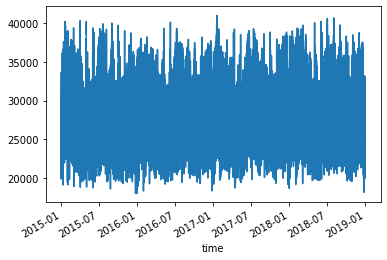

In [6]:
df['total load actual'].plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total load actual', ylabel='Density'>

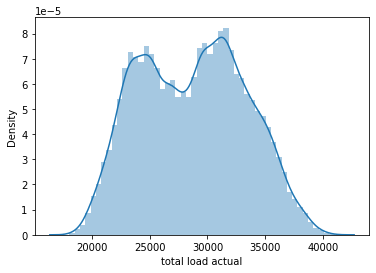

In [7]:
sns.distplot(df['total load actual'])

In [8]:
df.corr()['total load actual']

generation biomass                             0.083288
generation fossil brown coal/lignite           0.280461
generation fossil coal-derived gas                  NaN
generation fossil gas                          0.548913
generation fossil hard coal                    0.396564
generation fossil oil                          0.497089
generation fossil oil shale                         NaN
generation fossil peat                              NaN
generation geothermal                               NaN
generation hydro pumped storage aggregated          NaN
generation hydro pumped storage consumption   -0.562809
generation hydro run-of-river and poundage     0.118570
generation hydro water reservoir               0.479481
generation marine                                   NaN
generation nuclear                             0.085664
generation other                               0.100690
generation other renewable                     0.181714
generation solar                               0

In [9]:
# memindah kolom target ke urutan pertama
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('total load actual')) #Remove b from list
df = df[['total load actual']+cols] #Create new dataframe with columns in the order you want

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   total load actual                            35028 non-null  float64
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal            

Feature Extraction

In [11]:
# Data 2

# All
# df_new = df.drop(df.columns[[10, 23, 25, 26]], axis=1)

# tanpa minus & nan
# df_new = df.drop(df.columns[[3, 7, 8, 9, 10, 11, 14, 20, 23, 25, 26]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26]], axis=1)

# 3 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], axis=1)

# Target
df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total load actual  35028 non-null  float64
dtypes: float64(1)
memory usage: 547.9+ KB


In [13]:
values = df_new.values

In [14]:
values.shape

(35064, 1)

## Normalisasi

In [15]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
# Z-score
# scaled = stats.zscore(values, axis = 1)

#Z-Score
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

## Convert to Time Series

In [16]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [17]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

var1(t-1)   var1(t)
1   0.319666  0.276008
2   0.276008  0.204274
3   0.204274  0.141247
4   0.141247  0.096762
5   0.096762  0.081135

In [18]:
reframed.shape

(35005, 2)

In [19]:
# Data 2

# All
# reframed.drop(reframed.columns[[x for x in range(25, 48)]], axis=1, inplace=True)

# no minus dan NaN
# reframed.drop(reframed.columns[[x for x in range(18, 34)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
# reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

var1(t-1)   var1(t)
1   0.319666  0.276008
2   0.276008  0.204274
3   0.204274  0.141247
4   0.141247  0.096762
5   0.096762  0.081135

## Split data

In [ ]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model Building

### Random Search

In [ ]:
#design network LSTM
model = Sequential()
model.add(LSTM(38, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 38, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, 1, 93)             8835      
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 93)             0         
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 1, 93)             17391     
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 93)             0         
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, 1, 93)             17391     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 93)             0         
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 1, 93)            

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=80, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/91
351/351 [==============================] - 9s 13ms/step - loss: 0.6061 - val_loss: 0.6049
Epoch 2/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5968 - val_loss: 0.6065
Epoch 3/91
351/351 [==============================] - 5s 14ms/step - loss: 0.5961 - val_loss: 0.6059
Epoch 4/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5944 - val_loss: 0.6050
Epoch 5/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5942 - val_loss: 0.6103
Epoch 6/91
351/351 [==============================] - 5s 13ms/step - loss: 0.5948 - val_loss: 0.6106
Epoch 7/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5956 - val_loss: 0.6083
Epoch 8/91
351/351 [==============================] - 4s 12ms/step - loss: 0.5938 - val_loss: 0.6114
Epoch 9/91
351/351 [==============================] - 5s 13ms/step - loss: 0.5941 - val_loss: 0.6098
Epoch 10/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5940 - val_lo

### Grid Search

In [ ]:
#design network LSTM
model = Sequential()
model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_11 (SimpleRNN)    (None, 1, 32)             1088      
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 1, 32)             2080      
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 1, 32)             2080      
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)             

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/50
351/351 [==============================] - 4s 5ms/step - loss: 0.6286 - val_loss: 0.5898
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5912 - val_loss: 0.5893
Epoch 3/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5904 - val_loss: 0.5887
Epoch 4/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5900 - val_loss: 0.5885
Epoch 5/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5894 - val_loss: 0.5883
Epoch 6/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5892 - val_loss: 0.5882
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5891 - val_loss: 0.5881
Epoch 8/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5889 - val_loss: 0.5882
Epoch 9/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5888 - val_loss: 0.5880
Epoch 10/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5886 - val_loss: 0.5880

# Evaluasi

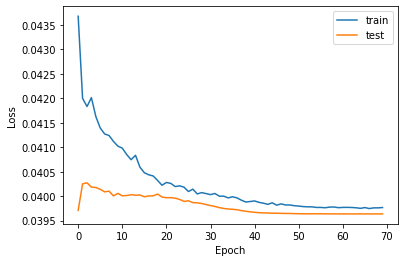

In [ ]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [ ]:
#membuat prediksi training
xhat = model.predict(train_X)
xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

InvalidArgumentError: ignored

In [ ]:
# calculate RMSE
np.seterr(divide='ignore', invalid='ignore')
def mean_absolute_percentage_error(yhat, test_y):
    yhat, test_y = np.array(yhat), np.array(test_y)
    return np.mean(np.abs((yhat, test_y) / test_y))

print('==============minmax===================')
print(f'MAPE test is : {(mean_absolute_percentage_error(test_y, yhat))}')
print(f'MAPE test invert is : {(mean_absolute_percentage_error(inv_y, inv_yhat))}')

print('==============zscore===================')
print(f'MAPE test is : {(mean_absolute_percentage_error(yhat, test_y))}')
print(f'MAPE test invert is : {(mean_absolute_percentage_error(inv_yhat, inv_y))}')

print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.3f' % rmsetest)
rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

print(f'R2 test is : {r2_score(test_y, yhat)}')
print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

In [ ]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.plot(test_y, label='Actual')
pyplot.plot(yhat, label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

In [ ]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(20,4))
pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('TOTAL Load', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

# 5 run grid

## tanh zscore

Epoch 1/50
351/351 [==============================] - 58s 35ms/step - loss: 0.7643 - val_loss: 0.5965
Epoch 2/50
351/351 [==============================] - 9s 25ms/step - loss: 0.5928 - val_loss: 0.5896
Epoch 3/50
351/351 [==============================] - 7s 21ms/step - loss: 0.5884 - val_loss: 0.5872
Epoch 4/50
351/351 [==============================] - 8s 22ms/step - loss: 0.5867 - val_loss: 0.5859
Epoch 5/50
351/351 [==============================] - 8s 23ms/step - loss: 0.5856 - val_loss: 0.5854
Epoch 6/50
351/351 [==============================] - 6s 17ms/step - loss: 0.5853 - val_loss: 0.5850
Epoch 7/50
351/351 [==============================] - 4s 13ms/step - loss: 0.5853 - val_loss: 0.5849
Epoch 8/50
351/351 [==============================] - 4s 13ms/step - loss: 0.5852 - val_loss: 0.5849
Epoch 9/50
351/351 [==============================] - 5s 14ms/step - loss: 0.5851 - val_loss: 0.5850
Epoch 10/50
351/351 [==============================] - 4s 13ms/step - loss: 0.5851 - val_l

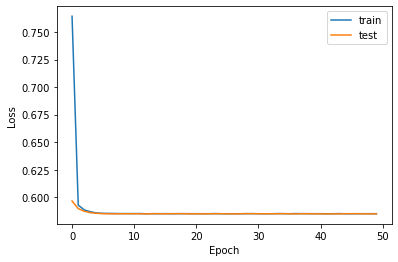

==============minmax===================
MAPE test is : 2.13562
MAPE test invert is : 0.10594
==============zscore===================
MAPE test is : 7294914.05667
MAPE test invert is : 0.09097
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.701
R2 test is : 0.41488


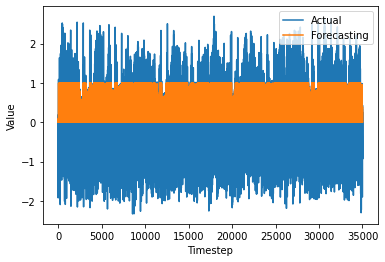

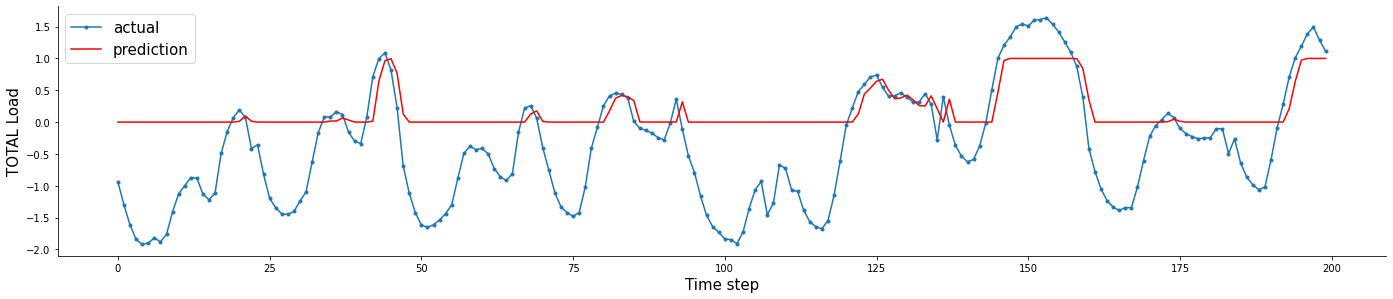

Epoch 1/50
351/351 [==============================] - 17s 18ms/step - loss: 0.7632 - val_loss: 0.5960
Epoch 2/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5924 - val_loss: 0.5894
Epoch 3/50
351/351 [==============================] - 6s 17ms/step - loss: 0.5883 - val_loss: 0.5871
Epoch 4/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5866 - val_loss: 0.5859
Epoch 5/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5857 - val_loss: 0.5853
Epoch 6/50
351/351 [==============================] - 6s 18ms/step - loss: 0.5854 - val_loss: 0.5851
Epoch 7/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5852 - val_loss: 0.5850
Epoch 8/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5851 - val_loss: 0.5849
Epoch 9/50
351/351 [==============================] - 5s 14ms/step - loss: 0.5852 - val_loss: 0.5849
Epoch 10/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5850 - val_l

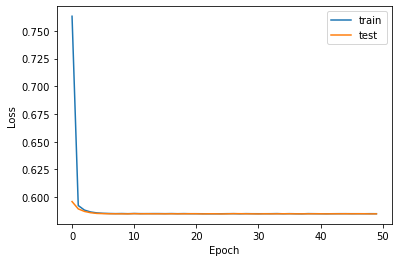

==============minmax===================
MAPE test is : 2.14111
MAPE test invert is : 0.10595
==============zscore===================
MAPE test is : 7977811.61077
MAPE test invert is : 0.09095
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.860
R2 test is : 0.41483


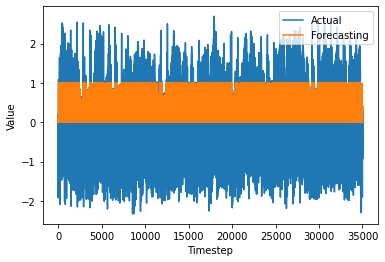

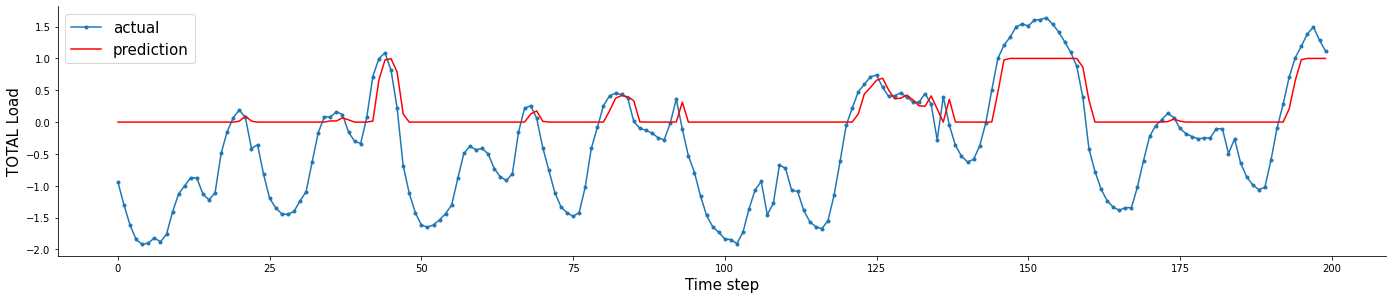

Epoch 1/50
351/351 [==============================] - 18s 18ms/step - loss: 0.7586 - val_loss: 0.5963
Epoch 2/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5925 - val_loss: 0.5891
Epoch 3/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5880 - val_loss: 0.5868
Epoch 4/50
351/351 [==============================] - 6s 16ms/step - loss: 0.5863 - val_loss: 0.5856
Epoch 5/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5856 - val_loss: 0.5851
Epoch 6/50
351/351 [==============================] - 5s 15ms/step - loss: 0.5853 - val_loss: 0.5850
Epoch 7/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5851 - val_loss: 0.5850
Epoch 8/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5850 - val_loss: 0.5849
Epoch 9/50
351/351 [==============================] - 6s 17ms/step - loss: 0.5850 - val_loss: 0.5848
Epoch 10/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5851 - val_l

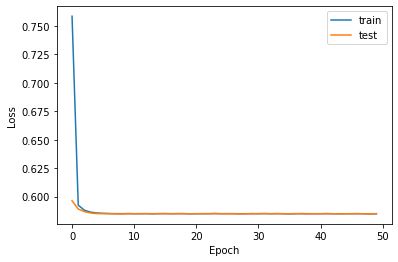

==============minmax===================
MAPE test is : 2.07849
MAPE test invert is : 0.10602
==============zscore===================
MAPE test is : 6164127.96165
MAPE test invert is : 0.09107
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.334
R2 test is : 0.41467


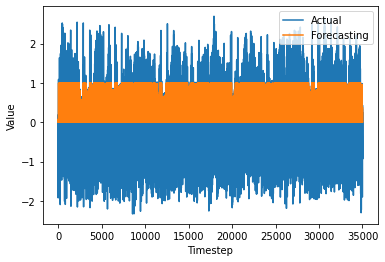

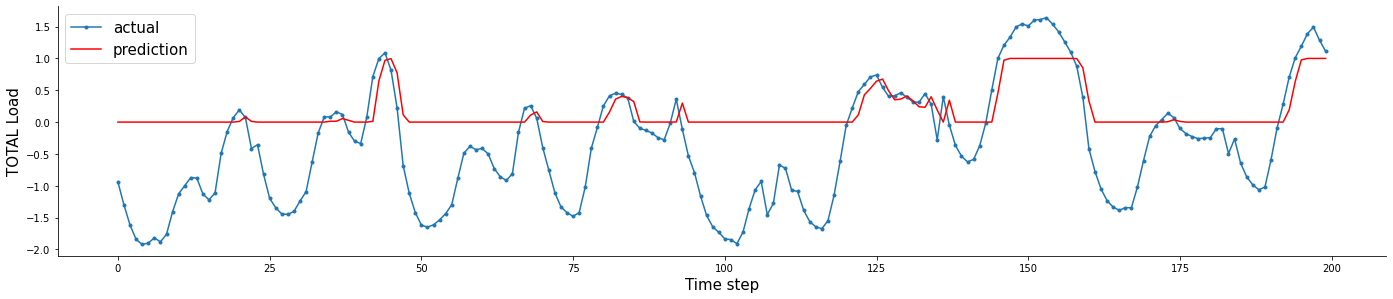

Epoch 1/50
351/351 [==============================] - 18s 18ms/step - loss: 0.7576 - val_loss: 0.5959
Epoch 2/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5923 - val_loss: 0.5891
Epoch 3/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5880 - val_loss: 0.5868
Epoch 4/50
351/351 [==============================] - 5s 15ms/step - loss: 0.5862 - val_loss: 0.5856
Epoch 5/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5857 - val_loss: 0.5851
Epoch 6/50
351/351 [==============================] - 5s 15ms/step - loss: 0.5853 - val_loss: 0.5851
Epoch 7/50
351/351 [==============================] - 5s 15ms/step - loss: 0.5851 - val_loss: 0.5851
Epoch 8/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5852 - val_loss: 0.5849
Epoch 9/50
351/351 [==============================] - 6s 17ms/step - loss: 0.5851 - val_loss: 0.5850
Epoch 10/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5850 - val_l

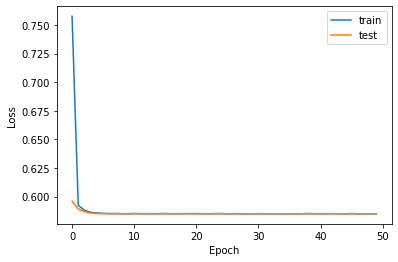

==============minmax===================
MAPE test is : 2.08223
MAPE test invert is : 0.10601
==============zscore===================
MAPE test is : 8196856.27696
MAPE test invert is : 0.09107
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.198
R2 test is : 0.41471


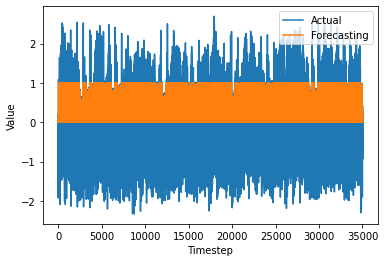

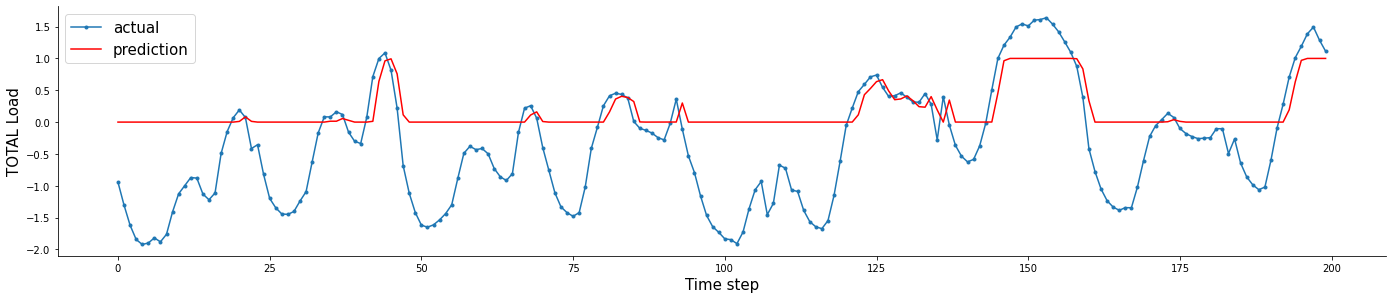

Epoch 1/50
351/351 [==============================] - 19s 19ms/step - loss: 0.7610 - val_loss: 0.5960
Epoch 2/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5928 - val_loss: 0.5897
Epoch 3/50
351/351 [==============================] - 8s 22ms/step - loss: 0.5885 - val_loss: 0.5874
Epoch 4/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5869 - val_loss: 0.5860
Epoch 5/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5859 - val_loss: 0.5854
Epoch 6/50
351/351 [==============================] - 6s 16ms/step - loss: 0.5853 - val_loss: 0.5851
Epoch 7/50
351/351 [==============================] - 4s 13ms/step - loss: 0.5852 - val_loss: 0.5849
Epoch 8/50
351/351 [==============================] - 5s 15ms/step - loss: 0.5851 - val_loss: 0.5850
Epoch 9/50
351/351 [==============================] - 5s 15ms/step - loss: 0.5852 - val_loss: 0.5850
Epoch 10/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5850 - val_l

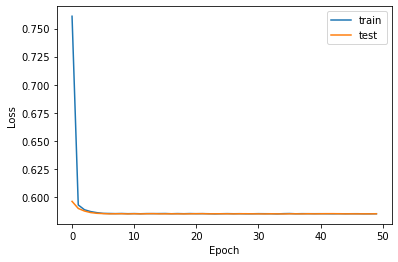

==============minmax===================
MAPE test is : 2.10926
MAPE test invert is : 0.10597
==============zscore===================
MAPE test is : 11630165.58969
MAPE test invert is : 0.09100
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.977
R2 test is : 0.41479


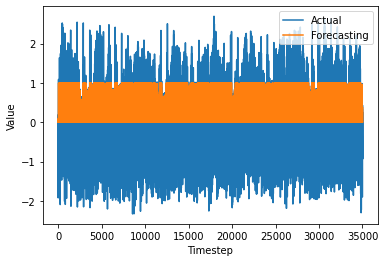

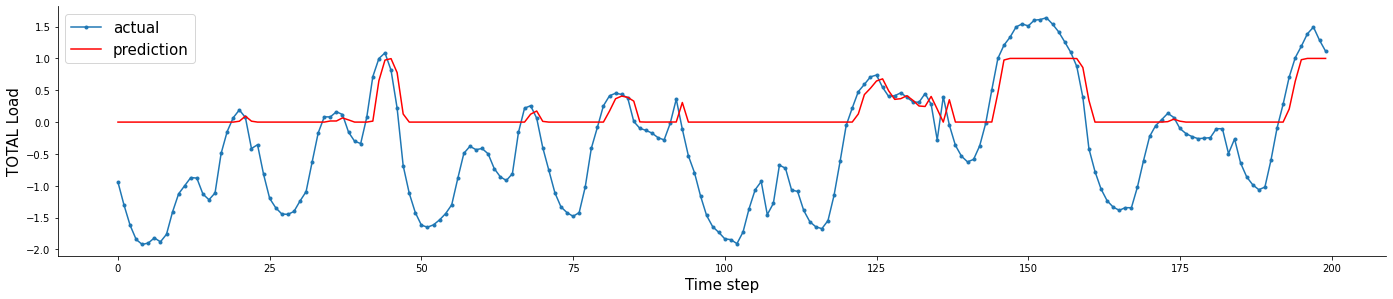

0                    1                    2  \
0   2,1356199679259094   2,1411146662461826    2,078485376872818   
1  0,10594392415322731  0,10594759167728927  0,10601826127069344   
2    7294914,056667415    7977811,610772523    6164127,961654575   
3  0,09097039579460334  0,09095375738998815   0,0910670646108201   
4   0.7647562550583096   0.7647910988618951    0.764894736185286   
5    3498,700709061897    3498,860116767954    3499,334249505587   
6   0,4148797983207053  0,41482647864479305  0,41466787343445743   
7                  314                  273                  265   

                     3                    4           nama  
0   2,0822330833212797   2,1092572957699516        mminmax  
1  0,10601028478941106  0,10597060271444858  minmax invert  
2    8196856,276960786   11630165,589689473         zscore  
3  0,09107007134018788  0,09099739811858666  zscpre invert  
4   0.7648649512857556    0.764816753904324           rmse  
5   3499,1979858942505   3498,9774866025164    rmse invert  
6  0,41471345805758786  0,41478721850345024             r2  
7                  274                  274          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network LSTM
  model = Sequential()
  model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.show()
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## tanh minmax

Epoch 1/50
351/351 [==============================] - 18s 18ms/step - loss: 0.0207 - val_loss: 0.0050
Epoch 2/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 3/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 4/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 5/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 6/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 7/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 8/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 9/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 10/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0046 - val_l

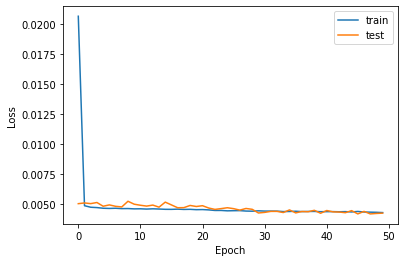

==============minmax===================
MAPE test is : 5242846210.84586
MAPE test invert is : 0.03943
==============zscore===================
MAPE test is : 0.13521
MAPE test invert is : 0.04088
RMSE Testing is : 0.065
RMSE Testing invert is : 1497.452
R2 test is : 0.89281


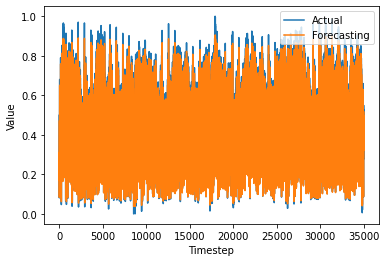

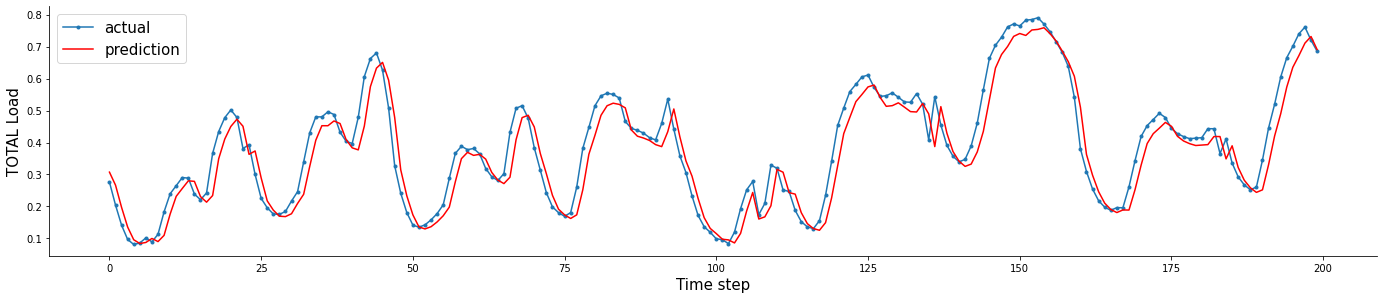

Epoch 1/50
351/351 [==============================] - 19s 18ms/step - loss: 0.0200 - val_loss: 0.0050
Epoch 2/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 3/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 4/50
351/351 [==============================] - 7s 19ms/step - loss: 0.0047 - val_loss: 0.0052
Epoch 5/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 6/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 7/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 8/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 9/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 10/50
351/351 [==============================] - 7s 20ms/step - loss: 0.0046 - val_l

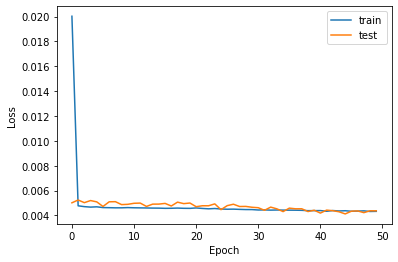

==============minmax===================
MAPE test is : 5441113555.03394
MAPE test invert is : 0.04023
==============zscore===================
MAPE test is : 0.13717
MAPE test invert is : 0.04182
RMSE Testing is : 0.066
RMSE Testing invert is : 1518.622
R2 test is : 0.88976


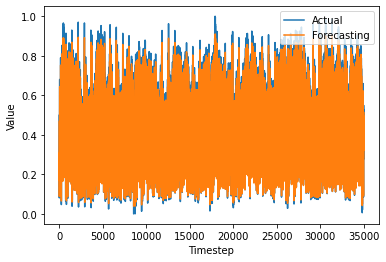

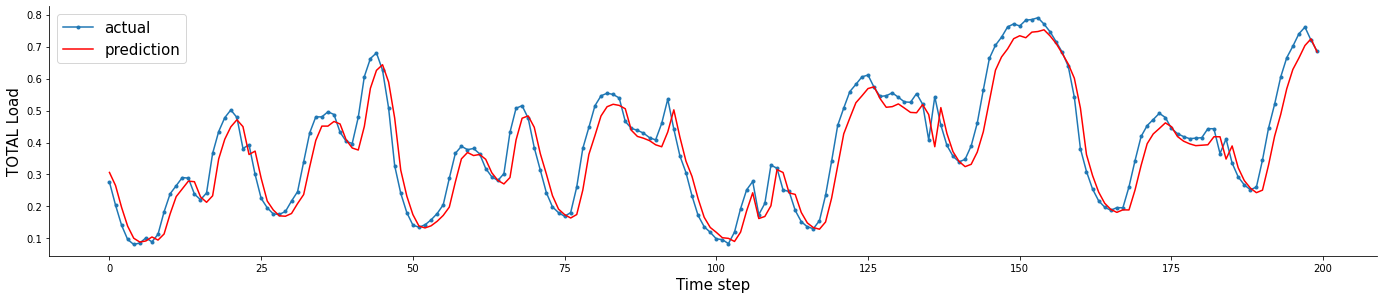

Epoch 1/50
351/351 [==============================] - 20s 22ms/step - loss: 0.0213 - val_loss: 0.0050
Epoch 2/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 3/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 4/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 5/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 6/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 7/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 8/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 9/50
351/351 [==============================] - 7s 20ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 10/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0046 - val_l

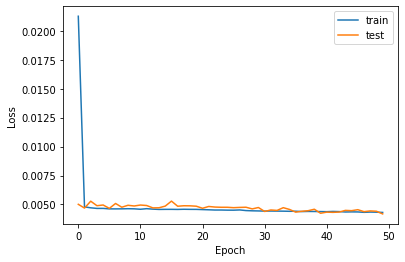

==============minmax===================
MAPE test is : 5714852729.70782
MAPE test invert is : 0.03899
==============zscore===================
MAPE test is : 0.13360
MAPE test invert is : 0.04037
RMSE Testing is : 0.065
RMSE Testing invert is : 1486.400
R2 test is : 0.89439


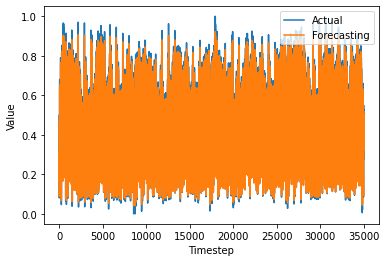

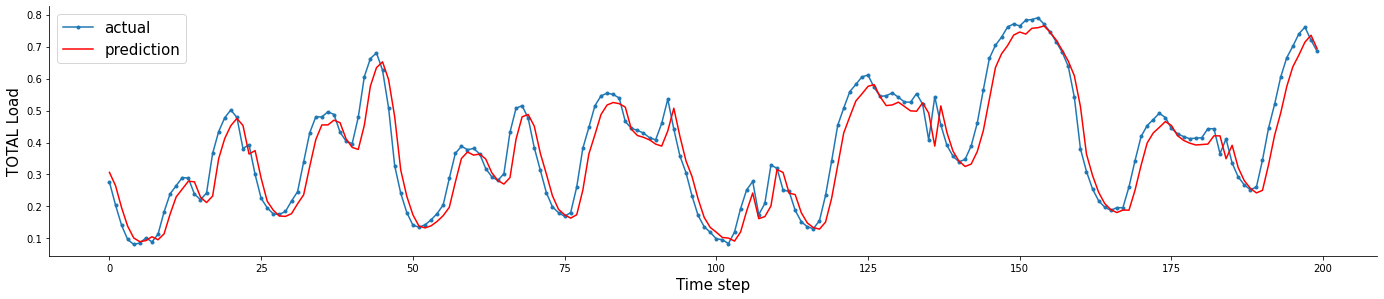

Epoch 1/50
351/351 [==============================] - 22s 22ms/step - loss: 0.0202 - val_loss: 0.0055
Epoch 2/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 3/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0047 - val_loss: 0.0054
Epoch 4/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 5/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 6/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 7/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 8/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 9/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 10/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0046 - val_l

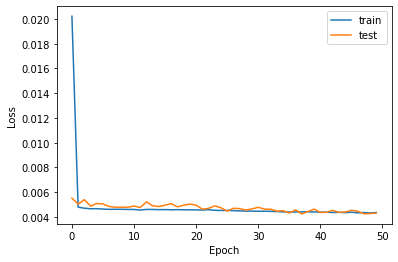

==============minmax===================
MAPE test is : 5410930382.49107
MAPE test invert is : 0.03968
==============zscore===================
MAPE test is : 0.13676
MAPE test invert is : 0.04125
RMSE Testing is : 0.066
RMSE Testing invert is : 1509.489
R2 test is : 0.89108


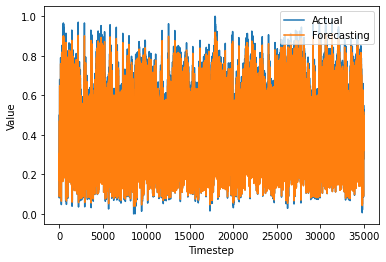

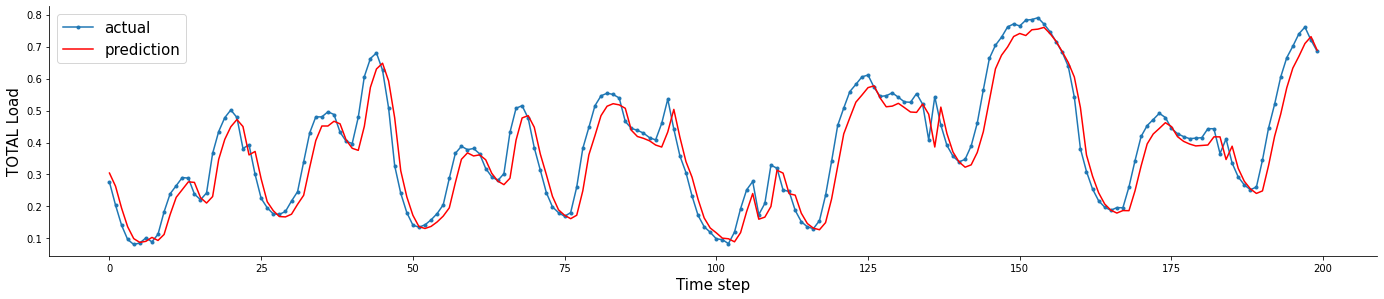

Epoch 1/50
351/351 [==============================] - 20s 19ms/step - loss: 0.0198 - val_loss: 0.0051
Epoch 2/50
351/351 [==============================] - 5s 16ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 3/50
351/351 [==============================] - 5s 16ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 4/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 5/50
351/351 [==============================] - 5s 14ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 6/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 7/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 8/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 9/50
351/351 [==============================] - 5s 16ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 10/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0046 - val_l

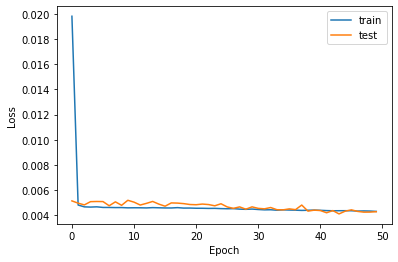

==============minmax===================
MAPE test is : 5604535285.39046
MAPE test invert is : 0.03963
==============zscore===================
MAPE test is : 0.13568
MAPE test invert is : 0.04112
RMSE Testing is : 0.065
RMSE Testing invert is : 1502.426
R2 test is : 0.89210


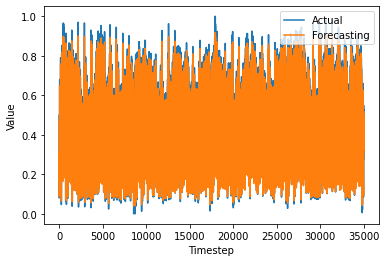

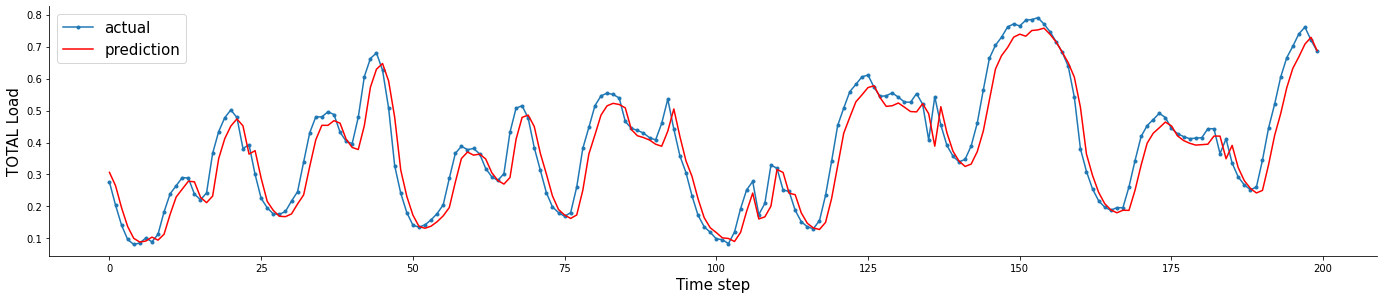

0                    1                    2  \
0     5242846210,84586   5441113555,0339365    5714852729,707824   
1  0,03942607782268724   0,0402341246880224  0,03899052951994694   
2  0,13520839346588903   0,1371725634736271  0,13359872444879764   
3  0,04088317098697972  0,04181712480410693  0,04037061050178684   
4  0.06518030250890869  0.06610178176553115  0.06469921108414405   
5   1497,4522698396681   1518,6223342813128   1486,3996754471254   
6   0,8928141432705136   0,8897620643002198   0,8943905671666457   
7                  250                  335                  318   

                     3                     4           nama  
0     5410930382,49107     5604535285,390465        mminmax  
1  0,03968083202861668   0,03963371162458167  minmax invert  
2  0,13675714812780596   0,13567645310223125         zscore  
3  0,04125265280871794  0,041119323277485215  zscpre invert  
4    0.065704234858345   0.06539678382152898           rmse  
5   1509,4890916356185     1502,425711515807    rmse invert  
6   0,8910840548615396    0,8921009748135929             r2  
7                  306                   335          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto2") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto2")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto2")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig minmax

Epoch 1/50
351/351 [==============================] - 18s 18ms/step - loss: 0.0418 - val_loss: 0.0397
Epoch 2/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0407 - val_loss: 0.0395
Epoch 3/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0400 - val_loss: 0.0389
Epoch 4/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0387 - val_loss: 0.0369
Epoch 5/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0356 - val_loss: 0.0312
Epoch 6/50
351/351 [==============================] - 5s 16ms/step - loss: 0.0299 - val_loss: 0.0207
Epoch 7/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0220 - val_loss: 0.0099
Epoch 8/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0157 - val_loss: 0.0070
Epoch 9/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0122 - val_loss: 0.0051
Epoch 10/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0099 - val_l

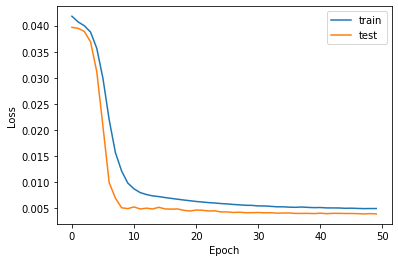

==============minmax===================
MAPE test is : 16797318943.94854
MAPE test invert is : 0.03913
==============zscore===================
MAPE test is : 0.12764
MAPE test invert is : 0.03961
RMSE Testing is : 0.063
RMSE Testing invert is : 1445.314
R2 test is : 0.90015


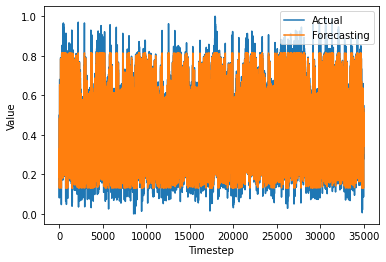

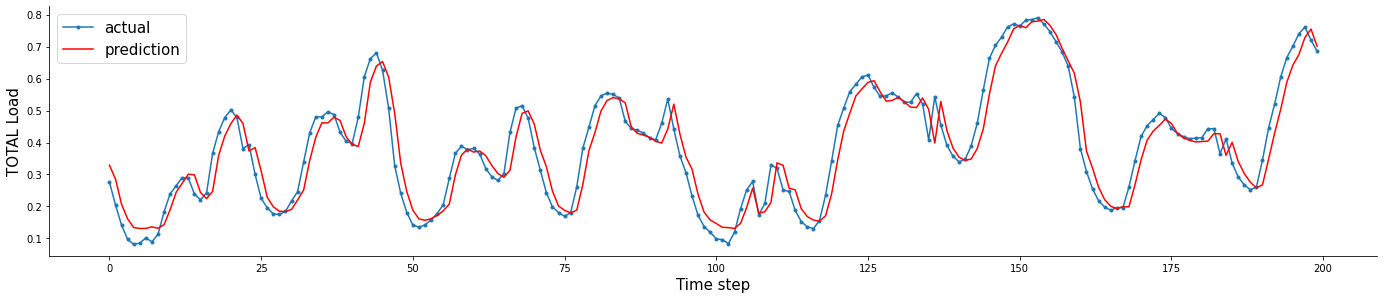

Epoch 1/50
351/351 [==============================] - 21s 21ms/step - loss: 0.0417 - val_loss: 0.0397
Epoch 2/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0407 - val_loss: 0.0396
Epoch 3/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0401 - val_loss: 0.0392
Epoch 4/50
351/351 [==============================] - 5s 14ms/step - loss: 0.0392 - val_loss: 0.0379
Epoch 5/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0370 - val_loss: 0.0336
Epoch 6/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0308 - val_loss: 0.0215
Epoch 7/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0224 - val_loss: 0.0097
Epoch 8/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0173 - val_loss: 0.0062
Epoch 9/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0143 - val_loss: 0.0054
Epoch 10/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0121 - val_l

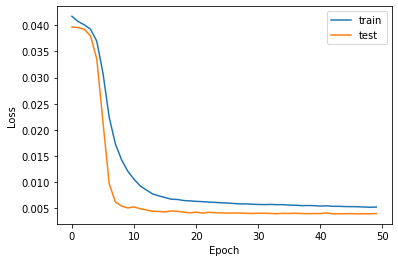

==============minmax===================
MAPE test is : 12337762869.42409
MAPE test invert is : 0.03949
==============zscore===================
MAPE test is : 0.12810
MAPE test invert is : 0.04004
RMSE Testing is : 0.063
RMSE Testing invert is : 1455.291
R2 test is : 0.89876


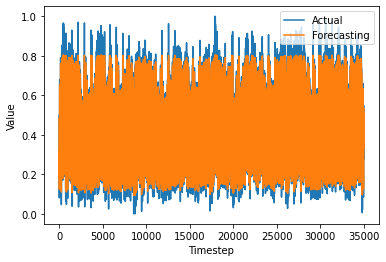

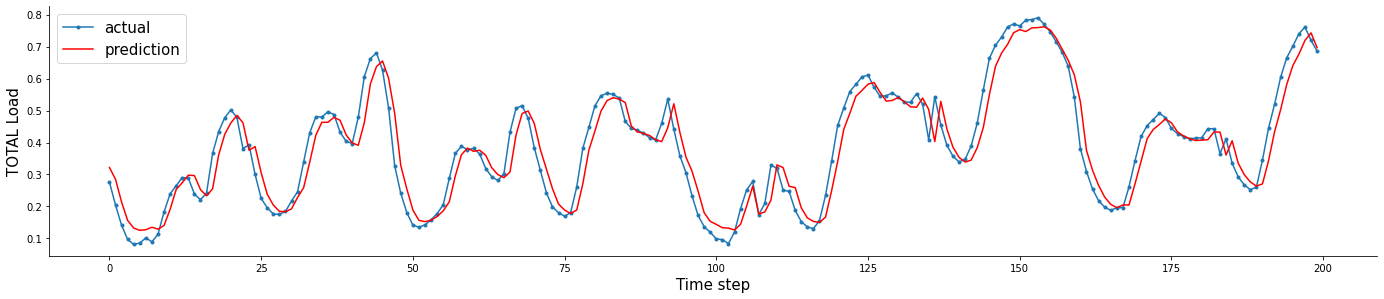

Epoch 1/50
351/351 [==============================] - 19s 19ms/step - loss: 0.0418 - val_loss: 0.0396
Epoch 2/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0408 - val_loss: 0.0395
Epoch 3/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0401 - val_loss: 0.0388
Epoch 4/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0385 - val_loss: 0.0365
Epoch 5/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0348 - val_loss: 0.0294
Epoch 6/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0277 - val_loss: 0.0167
Epoch 7/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0211 - val_loss: 0.0086
Epoch 8/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0167 - val_loss: 0.0070
Epoch 9/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0141 - val_loss: 0.0054
Epoch 10/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0122 - val_l

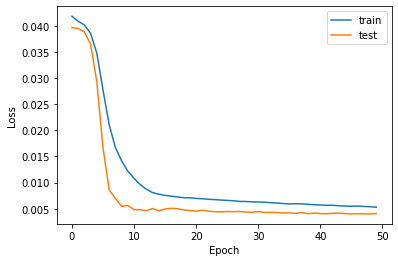

==============minmax===================
MAPE test is : 16645975562.98017
MAPE test invert is : 0.03928
==============zscore===================
MAPE test is : 0.12849
MAPE test invert is : 0.03992
RMSE Testing is : 0.064
RMSE Testing invert is : 1460.498
R2 test is : 0.89804


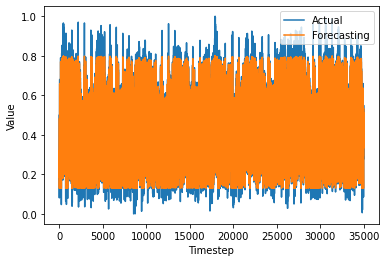

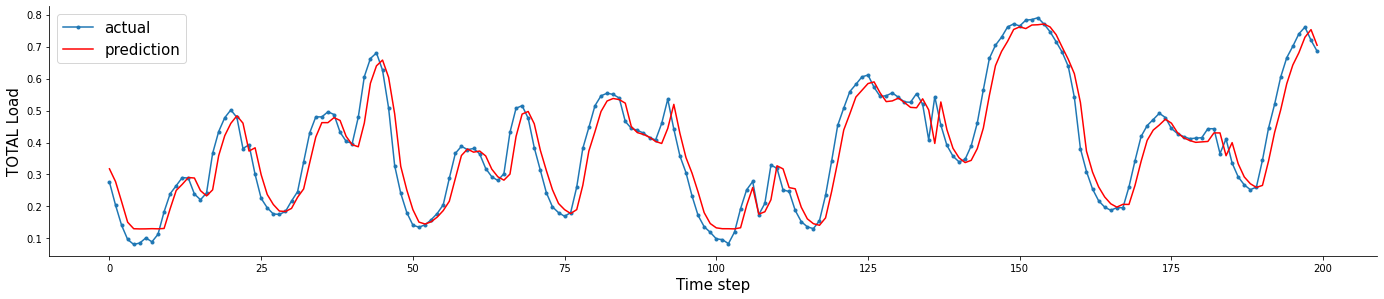

Epoch 1/50
351/351 [==============================] - 24s 24ms/step - loss: 0.0418 - val_loss: 0.0397
Epoch 2/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0407 - val_loss: 0.0396
Epoch 3/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0402 - val_loss: 0.0393
Epoch 4/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0393 - val_loss: 0.0380
Epoch 5/50
351/351 [==============================] - 7s 19ms/step - loss: 0.0367 - val_loss: 0.0330
Epoch 6/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0295 - val_loss: 0.0190
Epoch 7/50
351/351 [==============================] - 7s 19ms/step - loss: 0.0204 - val_loss: 0.0081
Epoch 8/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0154 - val_loss: 0.0068
Epoch 9/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0127 - val_loss: 0.0064
Epoch 10/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0106 - val_l

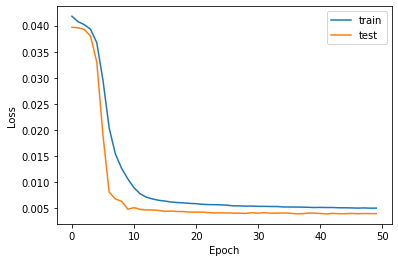

==============minmax===================
MAPE test is : 14971036665.90791
MAPE test invert is : 0.03898
==============zscore===================
MAPE test is : 0.12828
MAPE test invert is : 0.03969
RMSE Testing is : 0.063
RMSE Testing invert is : 1454.703
R2 test is : 0.89885


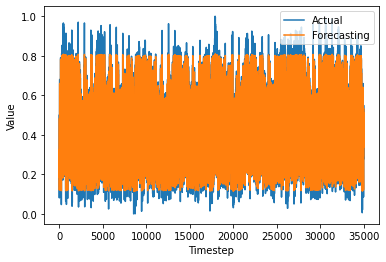

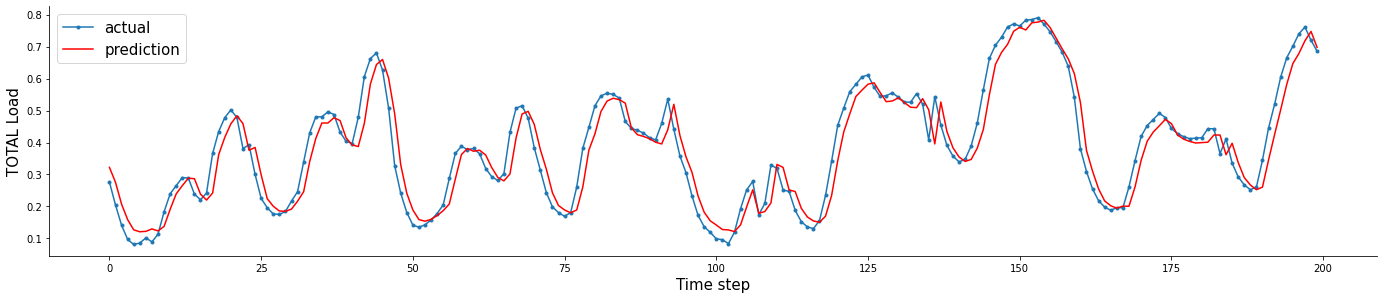

Epoch 1/50
351/351 [==============================] - 18s 19ms/step - loss: 0.0421 - val_loss: 0.0396
Epoch 2/50
351/351 [==============================] - 5s 14ms/step - loss: 0.0410 - val_loss: 0.0395
Epoch 3/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0401 - val_loss: 0.0390
Epoch 4/50
351/351 [==============================] - 5s 14ms/step - loss: 0.0390 - val_loss: 0.0373
Epoch 5/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0361 - val_loss: 0.0317
Epoch 6/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0296 - val_loss: 0.0197
Epoch 7/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0213 - val_loss: 0.0095
Epoch 8/50
351/351 [==============================] - 7s 20ms/step - loss: 0.0159 - val_loss: 0.0071
Epoch 9/50
351/351 [==============================] - 8s 22ms/step - loss: 0.0126 - val_loss: 0.0059
Epoch 10/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0102 - val_l

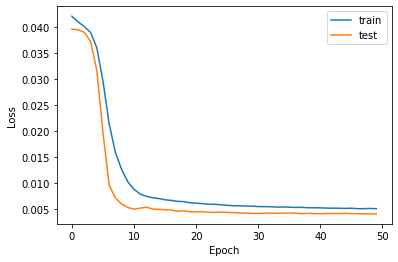

==============minmax===================
MAPE test is : 16502490466.07421
MAPE test invert is : 0.03925
==============zscore===================
MAPE test is : 0.12867
MAPE test invert is : 0.03988
RMSE Testing is : 0.063
RMSE Testing invert is : 1453.000
R2 test is : 0.89908


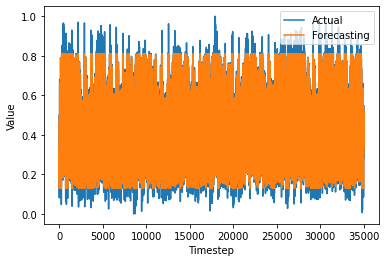

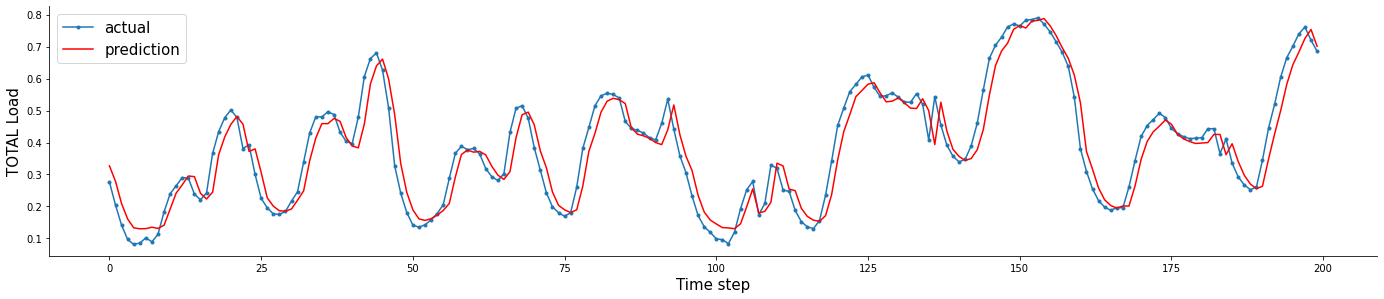

0                    1                    2  \
0    16797318943,94854    12337762869,42409   16645975562,980167   
1  0,03912879971962073  0,03948552318685722  0,03927516566023546   
2  0,12763545423903574  0,12809822118708186  0,12849130420487045   
3  0,03961463870471645  0,04003955362672298  0,03992207822094679   
4  0.06291084407580042  0.06334513496984517  0.06357177743309513   
5   1445,3137317974388   1455,2911307972229   1460,4980147479273   
6   0,9001482307527433   0,8987648637334699   0,8980391497023426   
7                  250                  303                  334   

                     3                     4           nama  
0   14971036665,907906    16502490466,074211        mminmax  
1  0,03897638306003438  0,039254317550699865  minmax invert  
2  0,12828443276454746   0,12867204332123952         zscore  
3  0,03969128340936662  0,039882974472756245  zscpre invert  
4  0.06331954508161716   0.06324542904917585           rmse  
5   1454,7032287050727     1453,000486975766    rmse invert  
6   0,8988466402599324    0,8990833032992228             r2  
7                  338                   333          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto3
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto3") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto3")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto3")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig zscore

Epoch 1/50
351/351 [==============================] - 16s 16ms/step - loss: 1.0412 - val_loss: 0.9839
Epoch 2/50
351/351 [==============================] - 5s 13ms/step - loss: 0.9623 - val_loss: 0.9197
Epoch 3/50
351/351 [==============================] - 4s 12ms/step - loss: 0.8754 - val_loss: 0.7950
Epoch 4/50
351/351 [==============================] - 4s 11ms/step - loss: 0.7523 - val_loss: 0.6693
Epoch 5/50
351/351 [==============================] - 6s 17ms/step - loss: 0.6503 - val_loss: 0.6081
Epoch 6/50
351/351 [==============================] - 4s 11ms/step - loss: 0.6116 - val_loss: 0.5945
Epoch 7/50
351/351 [==============================] - 4s 11ms/step - loss: 0.6021 - val_loss: 0.5926
Epoch 8/50
351/351 [==============================] - 6s 16ms/step - loss: 0.6003 - val_loss: 0.5927
Epoch 9/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5995 - val_loss: 0.5918
Epoch 10/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5988 - val_l

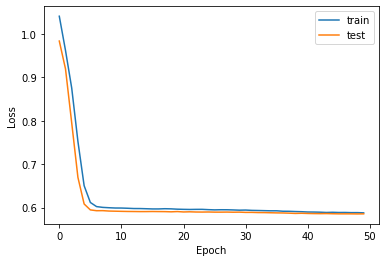

==============minmax===================
MAPE test is : 2.03289
MAPE test invert is : 0.10609
==============zscore===================
MAPE test is : 13781.14488
MAPE test invert is : 0.09116
RMSE Testing is : 0.765
RMSE Testing invert is : 3500.303
R2 test is : 0.41434


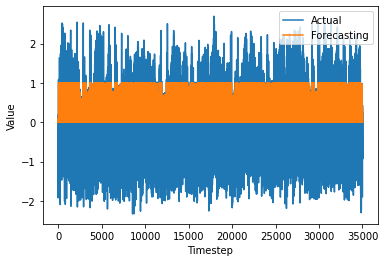

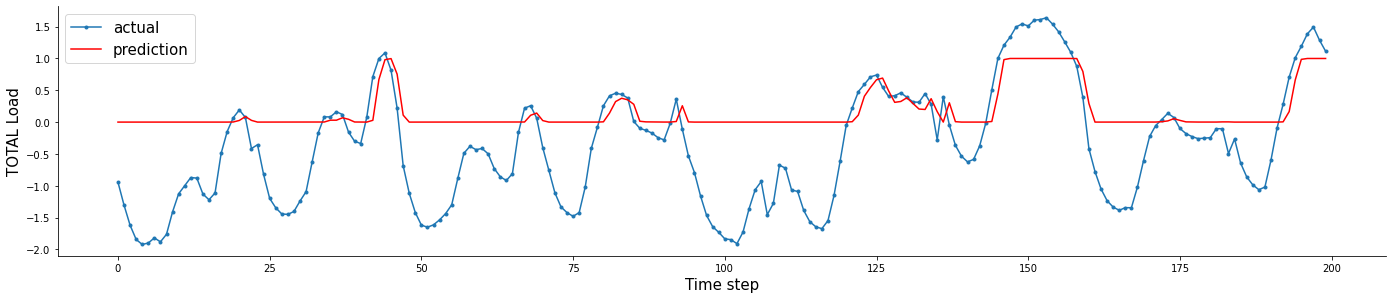

Epoch 1/50
351/351 [==============================] - 17s 15ms/step - loss: 1.0172 - val_loss: 0.9922
Epoch 2/50
351/351 [==============================] - 5s 13ms/step - loss: 0.9771 - val_loss: 0.9508
Epoch 3/50
351/351 [==============================] - 5s 13ms/step - loss: 0.9089 - val_loss: 0.8410
Epoch 4/50
351/351 [==============================] - 5s 13ms/step - loss: 0.7862 - val_loss: 0.6978
Epoch 5/50
351/351 [==============================] - 5s 15ms/step - loss: 0.6665 - val_loss: 0.6125
Epoch 6/50
351/351 [==============================] - 5s 13ms/step - loss: 0.6132 - val_loss: 0.5943
Epoch 7/50
351/351 [==============================] - 4s 12ms/step - loss: 0.6021 - val_loss: 0.5922
Epoch 8/50
351/351 [==============================] - 5s 15ms/step - loss: 0.6001 - val_loss: 0.5920
Epoch 9/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5980 - val_loss: 0.5910
Epoch 10/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5982 - val_l

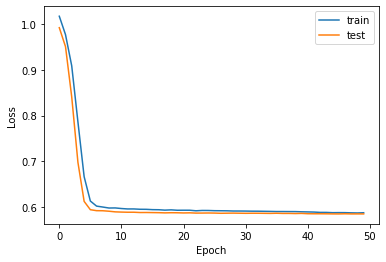

==============minmax===================
MAPE test is : 2.08406
MAPE test invert is : 0.10602
==============zscore===================
MAPE test is : 14962.95610
MAPE test invert is : 0.09106
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.477
R2 test is : 0.41462


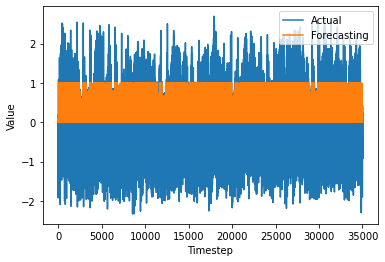

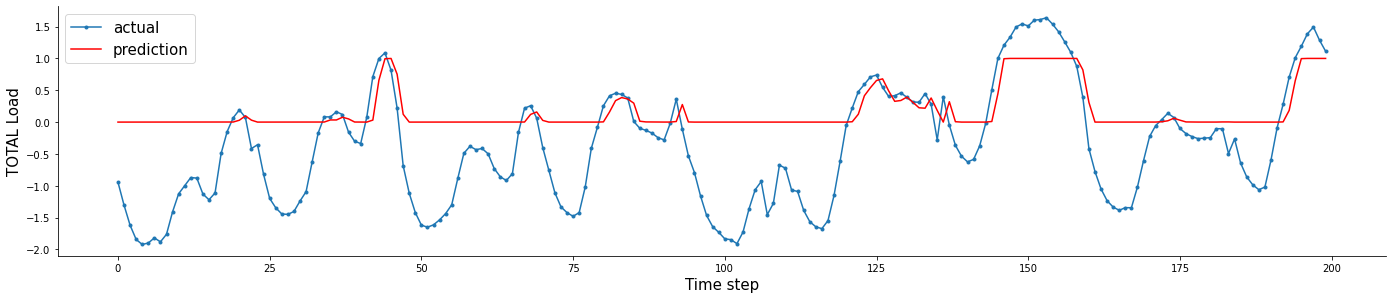

Epoch 1/50
351/351 [==============================] - 20s 22ms/step - loss: 1.0329 - val_loss: 0.9827
Epoch 2/50
351/351 [==============================] - 5s 13ms/step - loss: 0.9571 - val_loss: 0.9104
Epoch 3/50
351/351 [==============================] - 6s 18ms/step - loss: 0.8599 - val_loss: 0.7674
Epoch 4/50
351/351 [==============================] - 5s 14ms/step - loss: 0.7236 - val_loss: 0.6449
Epoch 5/50
351/351 [==============================] - 5s 13ms/step - loss: 0.6313 - val_loss: 0.5985
Epoch 6/50
351/351 [==============================] - 6s 18ms/step - loss: 0.6049 - val_loss: 0.5924
Epoch 7/50
351/351 [==============================] - 5s 14ms/step - loss: 0.6007 - val_loss: 0.5919
Epoch 8/50
351/351 [==============================] - 6s 16ms/step - loss: 0.5997 - val_loss: 0.5918
Epoch 9/50
351/351 [==============================] - 4s 13ms/step - loss: 0.5986 - val_loss: 0.5913
Epoch 10/50
351/351 [==============================] - 4s 13ms/step - loss: 0.5989 - val_l

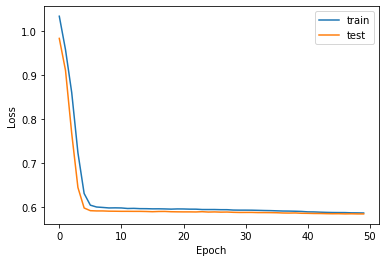

==============minmax===================
MAPE test is : 2.09626
MAPE test invert is : 0.10601
==============zscore===================
MAPE test is : 22361.93055
MAPE test invert is : 0.09104
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.424
R2 test is : 0.41464


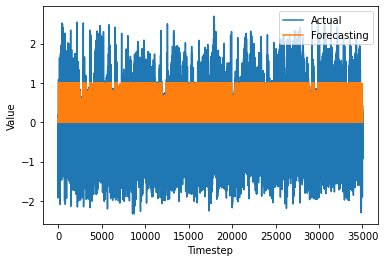

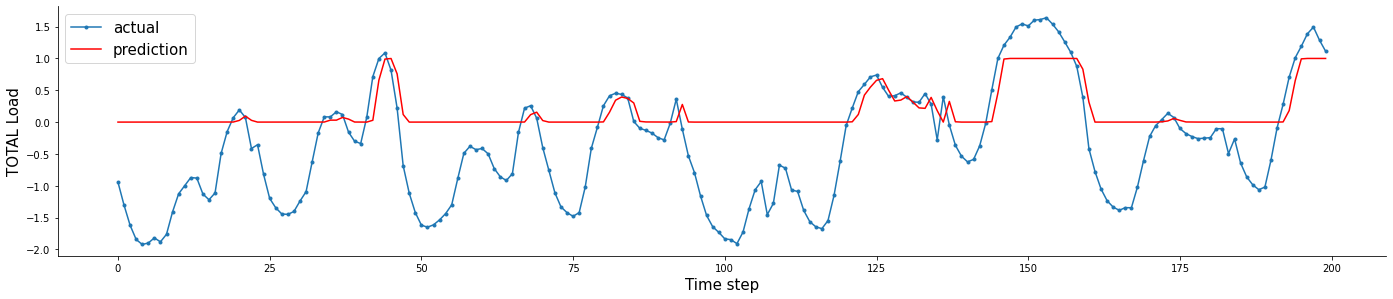

Epoch 1/50
351/351 [==============================] - 21s 22ms/step - loss: 1.0359 - val_loss: 0.9876
Epoch 2/50
351/351 [==============================] - 5s 15ms/step - loss: 0.9664 - val_loss: 0.9292
Epoch 3/50
351/351 [==============================] - 6s 18ms/step - loss: 0.8822 - val_loss: 0.8005
Epoch 4/50
351/351 [==============================] - 5s 14ms/step - loss: 0.7572 - val_loss: 0.6751
Epoch 5/50
351/351 [==============================] - 7s 20ms/step - loss: 0.6558 - val_loss: 0.6110
Epoch 6/50
351/351 [==============================] - 6s 16ms/step - loss: 0.6131 - val_loss: 0.5953
Epoch 7/50
351/351 [==============================] - 7s 19ms/step - loss: 0.6023 - val_loss: 0.5930
Epoch 8/50
351/351 [==============================] - 5s 15ms/step - loss: 0.6004 - val_loss: 0.5927
Epoch 9/50
351/351 [==============================] - 6s 16ms/step - loss: 0.5996 - val_loss: 0.5917
Epoch 10/50
351/351 [==============================] - 6s 16ms/step - loss: 0.5987 - val_l

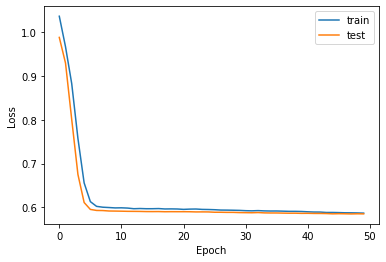

==============minmax===================
MAPE test is : 2.05735
MAPE test invert is : 0.10603
==============zscore===================
MAPE test is : 21914.70527
MAPE test invert is : 0.09108
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.605
R2 test is : 0.41458


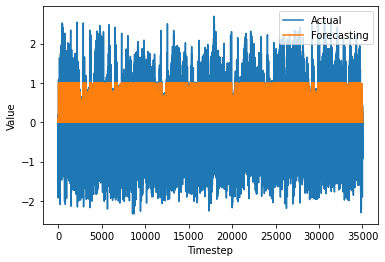

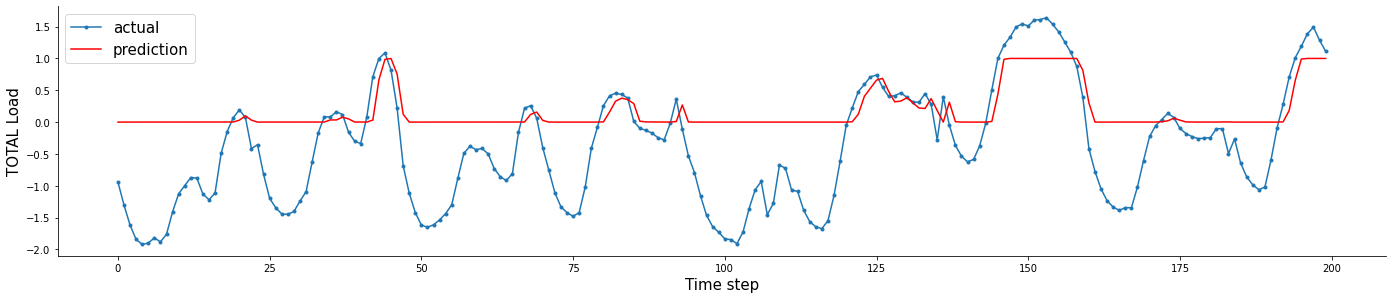

Epoch 1/50
351/351 [==============================] - 16s 15ms/step - loss: 1.0413 - val_loss: 0.9855
Epoch 2/50
351/351 [==============================] - 6s 17ms/step - loss: 0.9622 - val_loss: 0.9177
Epoch 3/50
351/351 [==============================] - 4s 12ms/step - loss: 0.8668 - val_loss: 0.7794
Epoch 4/50
351/351 [==============================] - 5s 14ms/step - loss: 0.7373 - val_loss: 0.6537
Epoch 5/50
351/351 [==============================] - 5s 15ms/step - loss: 0.6399 - val_loss: 0.6035
Epoch 6/50
351/351 [==============================] - 4s 12ms/step - loss: 0.6078 - val_loss: 0.5934
Epoch 7/50
351/351 [==============================] - 6s 16ms/step - loss: 0.6012 - val_loss: 0.5921
Epoch 8/50
351/351 [==============================] - 5s 14ms/step - loss: 0.5999 - val_loss: 0.5919
Epoch 9/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5992 - val_loss: 0.5916
Epoch 10/50
351/351 [==============================] - 6s 17ms/step - loss: 0.5990 - val_l

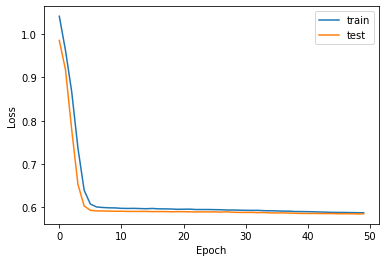

==============minmax===================
MAPE test is : 2.02611
MAPE test invert is : 0.10610
==============zscore===================
MAPE test is : 18145.06578
MAPE test invert is : 0.09117
RMSE Testing is : 0.765
RMSE Testing invert is : 3500.330
R2 test is : 0.41433


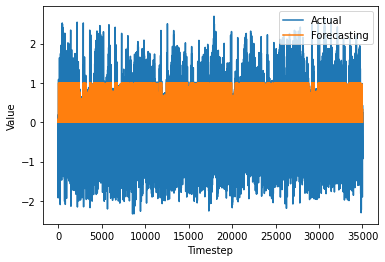

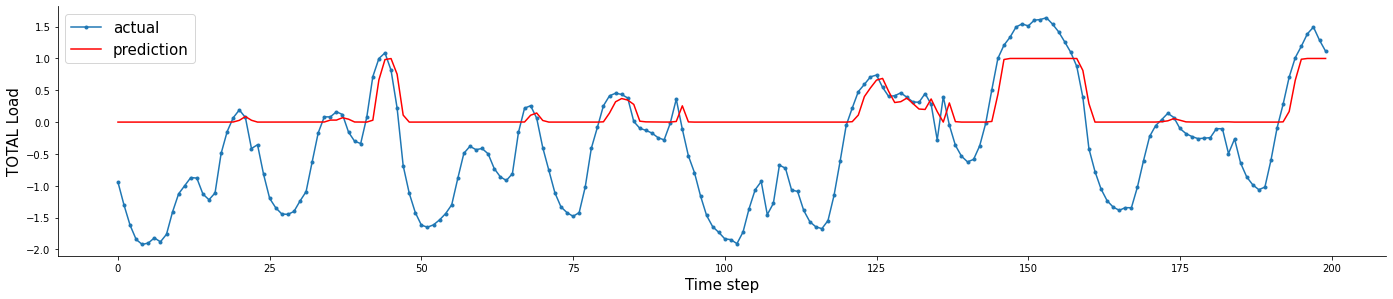

0                    1                    2  \
0    2,032890201795572    2,084055707158181      2,0962633389123   
1  0,10609234088203129  0,10602298864461901   0,1060086504591871   
2   13781,144877941419     14962,9561004838   22361,930550538596   
3  0,09115716205920191  0,09105878899399271  0,09104029312583937   
4   0.7651065411195331   0.7649258702560745   0.7649144165985116   
5   3500,3032406955667   3499,4766854710642    3499,424285873713   
6  0,41434366307798387  0,41462022205999005   0,4146377523582442   
7                  245                  274                  334   

                     3                    4           nama  
0   2,0573548490441667   2,0261097401133084        mminmax  
1  0,10603066138162436  0,10610411224437187  minmax invert  
2   21914,705273047522   18145,065779601333         zscore  
3    0,091082972198752  0,09117327119479411  zscpre invert  
4   0.7649539767451968   0.7651124965291141           rmse  
5   3499,6052704846174   3500,3304862337177    rmse invert  
6  0,41457720279949595  0,41433454581980667             r2  
7                  335                  265          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto4
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')




  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto4") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto4")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto4")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

# 5 run random

## tanh zscore

Epoch 1/70
36/36 [==============================] - 32s 219ms/step - loss: 1.0132 - val_loss: 0.6930
Epoch 2/70
36/36 [==============================] - 5s 136ms/step - loss: 0.6368 - val_loss: 0.6059
Epoch 3/70
36/36 [==============================] - 6s 172ms/step - loss: 0.6009 - val_loss: 0.5970
Epoch 4/70
36/36 [==============================] - 4s 121ms/step - loss: 0.5956 - val_loss: 0.5931
Epoch 5/70
36/36 [==============================] - 5s 135ms/step - loss: 0.5924 - val_loss: 0.5910
Epoch 6/70
36/36 [==============================] - 6s 161ms/step - loss: 0.5906 - val_loss: 0.5905
Epoch 7/70
36/36 [==============================] - 4s 123ms/step - loss: 0.5892 - val_loss: 0.5890
Epoch 8/70
36/36 [==============================] - 6s 176ms/step - loss: 0.5882 - val_loss: 0.5883
Epoch 9/70
36/36 [==============================] - 5s 135ms/step - loss: 0.5874 - val_loss: 0.5876
Epoch 10/70
36/36 [==============================] - 5s 135ms/step - loss: 0.5868 - val_loss: 0.586

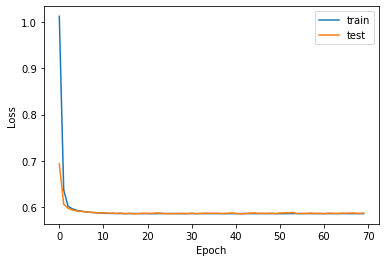

==============minmax===================
MAPE test is : 1.85295
MAPE test invert is : 0.10650
==============zscore===================
MAPE test is : 21714293.14177
MAPE test invert is : 0.09171
RMSE Testing is : 0.766
RMSE Testing invert is : 3503.684
R2 test is : 0.41321


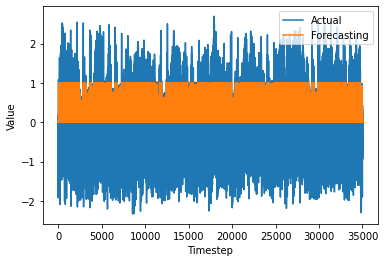

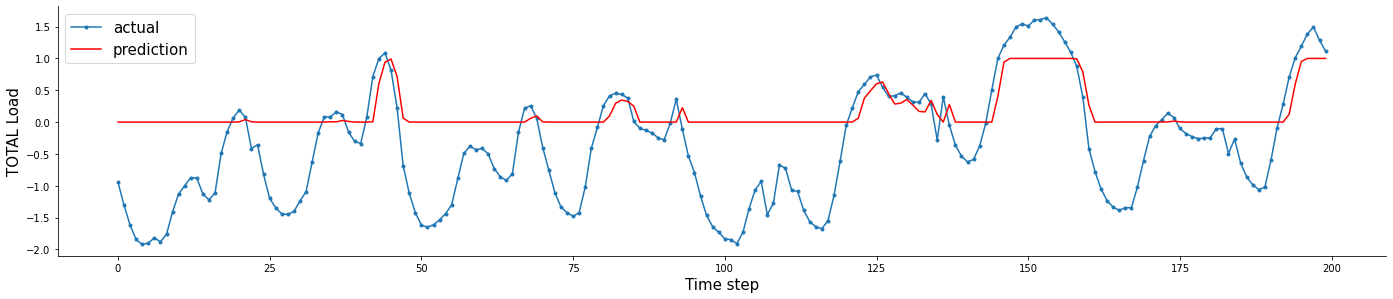

Epoch 1/70
36/36 [==============================] - 32s 222ms/step - loss: 1.0148 - val_loss: 0.6946
Epoch 2/70
36/36 [==============================] - 5s 138ms/step - loss: 0.6373 - val_loss: 0.6058
Epoch 3/70
36/36 [==============================] - 6s 181ms/step - loss: 0.6009 - val_loss: 0.5975
Epoch 4/70
36/36 [==============================] - 5s 127ms/step - loss: 0.5955 - val_loss: 0.5933
Epoch 5/70
36/36 [==============================] - 6s 173ms/step - loss: 0.5924 - val_loss: 0.5908
Epoch 6/70
36/36 [==============================] - 5s 138ms/step - loss: 0.5905 - val_loss: 0.5898
Epoch 7/70
36/36 [==============================] - 4s 125ms/step - loss: 0.5892 - val_loss: 0.5888
Epoch 8/70
36/36 [==============================] - 6s 176ms/step - loss: 0.5882 - val_loss: 0.5881
Epoch 9/70
36/36 [==============================] - 5s 137ms/step - loss: 0.5875 - val_loss: 0.5877
Epoch 10/70
36/36 [==============================] - 6s 174ms/step - loss: 0.5870 - val_loss: 0.587

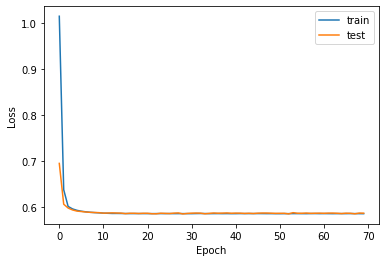

==============minmax===================
MAPE test is : 1.88155
MAPE test invert is : 0.10641
==============zscore===================
MAPE test is : 24414660.31755
MAPE test invert is : 0.09159
RMSE Testing is : 0.766
RMSE Testing invert is : 3502.797
R2 test is : 0.41351


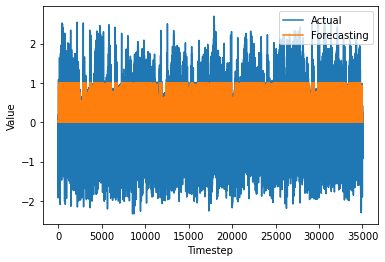

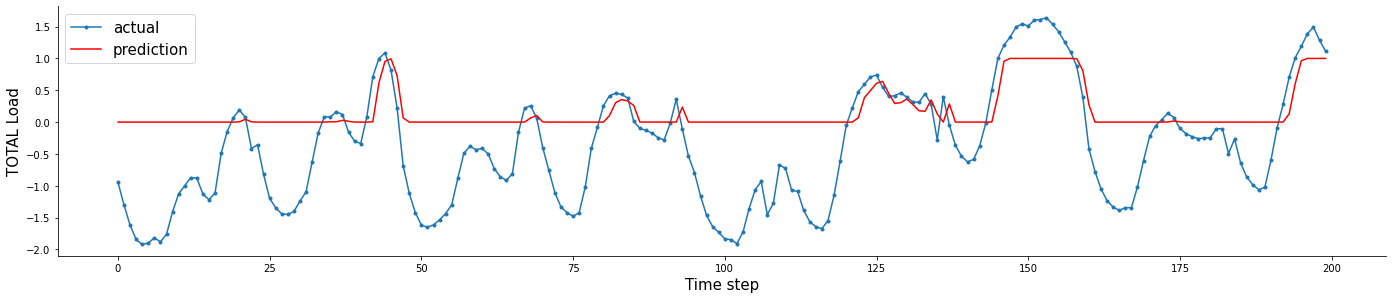

Epoch 1/70
36/36 [==============================] - 30s 184ms/step - loss: 1.0223 - val_loss: 0.7002
Epoch 2/70
36/36 [==============================] - 6s 180ms/step - loss: 0.6400 - val_loss: 0.6067
Epoch 3/70
36/36 [==============================] - 6s 167ms/step - loss: 0.6016 - val_loss: 0.5979
Epoch 4/70
36/36 [==============================] - 6s 167ms/step - loss: 0.5960 - val_loss: 0.5937
Epoch 5/70
36/36 [==============================] - 5s 140ms/step - loss: 0.5926 - val_loss: 0.5910
Epoch 6/70
36/36 [==============================] - 6s 163ms/step - loss: 0.5905 - val_loss: 0.5893
Epoch 7/70
36/36 [==============================] - 5s 140ms/step - loss: 0.5891 - val_loss: 0.5888
Epoch 8/70
36/36 [==============================] - 5s 128ms/step - loss: 0.5882 - val_loss: 0.5888
Epoch 9/70
36/36 [==============================] - 6s 166ms/step - loss: 0.5876 - val_loss: 0.5886
Epoch 10/70
36/36 [==============================] - 5s 143ms/step - loss: 0.5868 - val_loss: 0.587

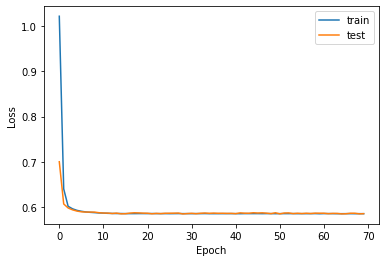

==============minmax===================
MAPE test is : 2.02249
MAPE test invert is : 0.10611
==============zscore===================
MAPE test is : 10989502.40060
MAPE test invert is : 0.09122
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.928
R2 test is : 0.41447


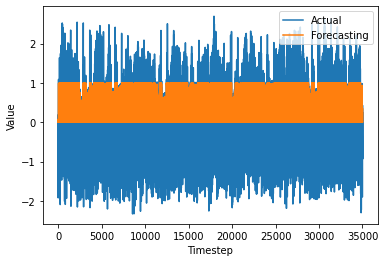

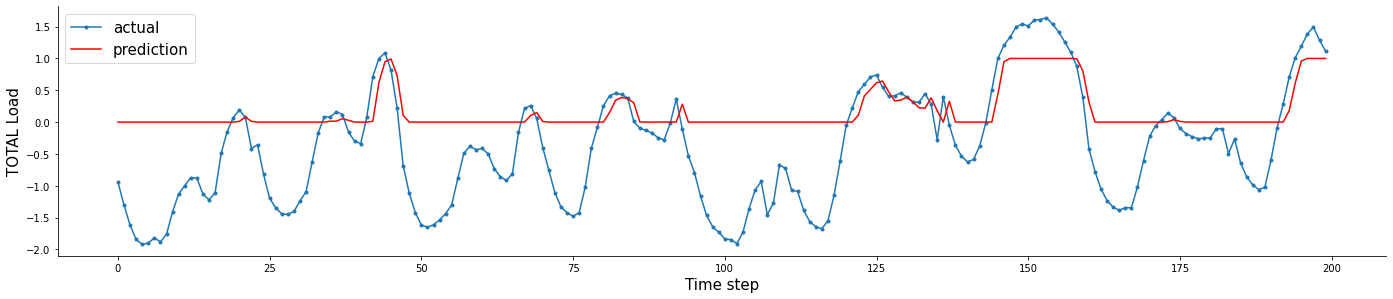

Epoch 1/70
36/36 [==============================] - 31s 193ms/step - loss: 1.0031 - val_loss: 0.6862
Epoch 2/70
36/36 [==============================] - 6s 165ms/step - loss: 0.6333 - val_loss: 0.6046
Epoch 3/70
36/36 [==============================] - 5s 141ms/step - loss: 0.6006 - val_loss: 0.5972
Epoch 4/70
36/36 [==============================] - 6s 178ms/step - loss: 0.5954 - val_loss: 0.5935
Epoch 5/70
36/36 [==============================] - 6s 178ms/step - loss: 0.5924 - val_loss: 0.5909
Epoch 6/70
36/36 [==============================] - 7s 183ms/step - loss: 0.5904 - val_loss: 0.5897
Epoch 7/70
36/36 [==============================] - 5s 140ms/step - loss: 0.5892 - val_loss: 0.5887
Epoch 8/70
36/36 [==============================] - 5s 140ms/step - loss: 0.5882 - val_loss: 0.5884
Epoch 9/70
36/36 [==============================] - 5s 148ms/step - loss: 0.5875 - val_loss: 0.5876
Epoch 10/70
36/36 [==============================] - 5s 139ms/step - loss: 0.5868 - val_loss: 0.587

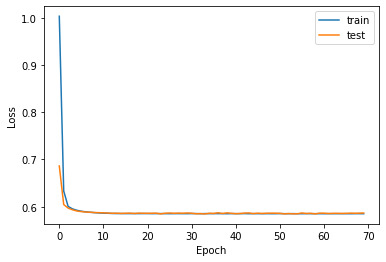

==============minmax===================
MAPE test is : 1.84069
MAPE test invert is : 0.10653
==============zscore===================
MAPE test is : 18138703.33909
MAPE test invert is : 0.09175
RMSE Testing is : 0.766
RMSE Testing invert is : 3504.073
R2 test is : 0.41308


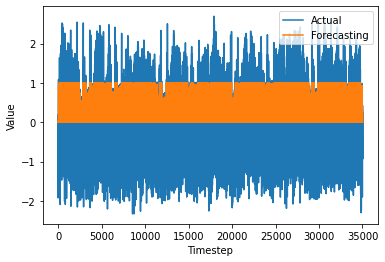

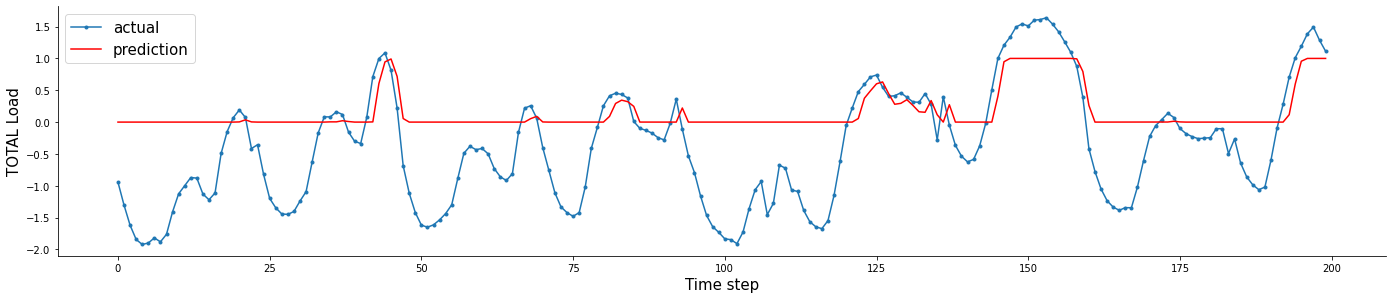

Epoch 1/70
36/36 [==============================] - 29s 181ms/step - loss: 1.0134 - val_loss: 0.6955
Epoch 2/70
36/36 [==============================] - 6s 177ms/step - loss: 0.6361 - val_loss: 0.6045
Epoch 3/70
36/36 [==============================] - 4s 124ms/step - loss: 0.6001 - val_loss: 0.5964
Epoch 4/70
36/36 [==============================] - 5s 137ms/step - loss: 0.5950 - val_loss: 0.5931
Epoch 5/70
36/36 [==============================] - 6s 160ms/step - loss: 0.5923 - val_loss: 0.5913
Epoch 6/70
36/36 [==============================] - 5s 138ms/step - loss: 0.5904 - val_loss: 0.5897
Epoch 7/70
36/36 [==============================] - 6s 164ms/step - loss: 0.5893 - val_loss: 0.5892
Epoch 8/70
36/36 [==============================] - 5s 139ms/step - loss: 0.5883 - val_loss: 0.5888
Epoch 9/70
36/36 [==============================] - 6s 179ms/step - loss: 0.5877 - val_loss: 0.5887
Epoch 10/70
36/36 [==============================] - 5s 127ms/step - loss: 0.5871 - val_loss: 0.587

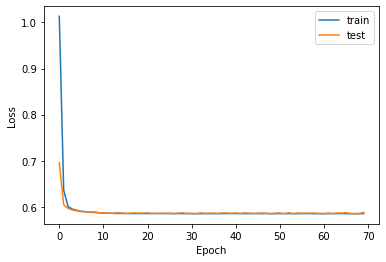

==============minmax===================
MAPE test is : 1.72654
MAPE test invert is : 0.10685
==============zscore===================
MAPE test is : 31548868.27731
MAPE test invert is : 0.09214
RMSE Testing is : 0.767
RMSE Testing invert is : 3507.677
R2 test is : 0.41187


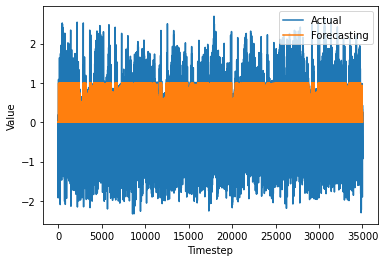

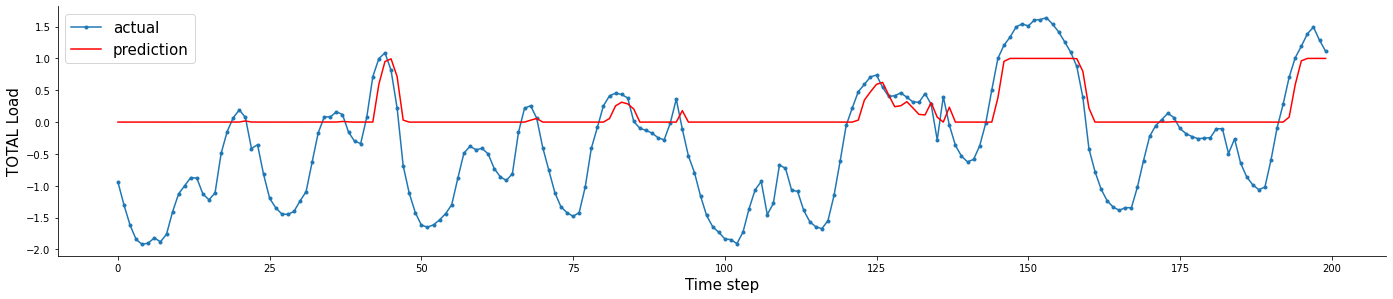

0                    1                    2  \
0   1,8529452423800956   1,8815464878315586    2,022491716934747   
1  0,10649544234257957  0,10640530034152199  0,10610652030718726   
2   21714293,141772617   24414660,317548532   10989502,400600282   
3   0,0917097298977371  0,09159042428790298  0,09121648972928606   
4   0.7658454408098855   0.7656516640244094   0.7650246185446541   
5   3503,6836496212377   3502,7971358173154   3499,9284512526274   
6   0,4132119246281527   0,4135088292405398   0,4144690728187893   
7                  406                  391                  466   

                     3                    4           nama  
0   1,8406865138010493   1,7265402989066176        mminmax  
1  0,10653039340316303  0,10685275998388691  minmax invert  
2   18138703,339086108   31548868,277311876         zscore  
3  0,09174964125979962  0,09213547378840531  zscpre invert  
4   0.7659305736800445   0.7667182287378168           rmse  
5    3504,073125916749   3507,6765868768875    rmse invert  
6   0,4130814603675742   0,4118737084566576             r2  
7                  406                  404          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto5
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network LSTM
  model = Sequential()
  model.add(LSTM(79, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=70, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start
  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto5") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto5")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto5")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## tanh minmax

Epoch 1/70
36/36 [==============================] - 33s 196ms/step - loss: 0.0401 - val_loss: 0.0396
Epoch 2/70
36/36 [==============================] - 6s 172ms/step - loss: 0.0313 - val_loss: 0.0085
Epoch 3/70
36/36 [==============================] - 5s 148ms/step - loss: 0.0055 - val_loss: 0.0076
Epoch 4/70
36/36 [==============================] - 6s 162ms/step - loss: 0.0052 - val_loss: 0.0076
Epoch 5/70
36/36 [==============================] - 5s 134ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 6/70
36/36 [==============================] - 7s 194ms/step - loss: 0.0051 - val_loss: 0.0070
Epoch 7/70
36/36 [==============================] - 5s 151ms/step - loss: 0.0050 - val_loss: 0.0068
Epoch 8/70
36/36 [==============================] - 6s 169ms/step - loss: 0.0050 - val_loss: 0.0073
Epoch 9/70
36/36 [==============================] - 5s 150ms/step - loss: 0.0050 - val_loss: 0.0066
Epoch 10/70
36/36 [==============================] - 6s 182ms/step - loss: 0.0049 - val_loss: 0.006

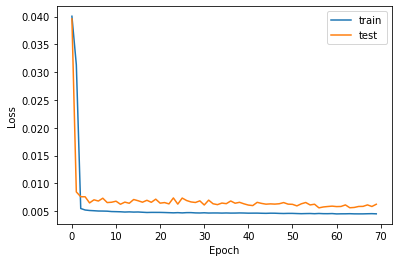

==============minmax===================
MAPE test is : 6781536188.92768
MAPE test invert is : 0.04860
==============zscore===================
MAPE test is : 0.18957
MAPE test invert is : 0.05230
RMSE Testing is : 0.079
RMSE Testing invert is : 1816.381
R2 test is : 0.84230


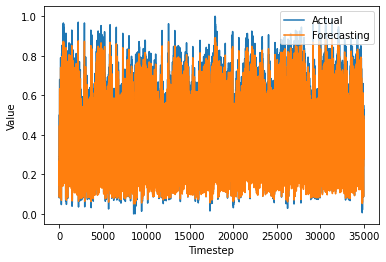

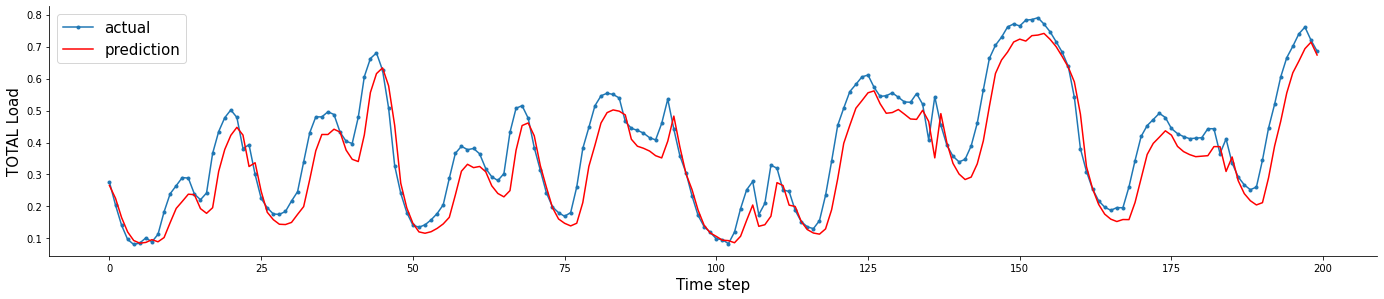

Epoch 1/70
36/36 [==============================] - 31s 203ms/step - loss: 0.0400 - val_loss: 0.0395
Epoch 2/70
36/36 [==============================] - 4s 125ms/step - loss: 0.0273 - val_loss: 0.0069
Epoch 3/70
36/36 [==============================] - 5s 142ms/step - loss: 0.0053 - val_loss: 0.0081
Epoch 4/70
36/36 [==============================] - 5s 143ms/step - loss: 0.0052 - val_loss: 0.0077
Epoch 5/70
36/36 [==============================] - 5s 136ms/step - loss: 0.0051 - val_loss: 0.0073
Epoch 6/70
36/36 [==============================] - 5s 148ms/step - loss: 0.0051 - val_loss: 0.0068
Epoch 7/70
36/36 [==============================] - 4s 123ms/step - loss: 0.0050 - val_loss: 0.0075
Epoch 8/70
36/36 [==============================] - 5s 147ms/step - loss: 0.0050 - val_loss: 0.0069
Epoch 9/70
36/36 [==============================] - 4s 122ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 10/70
36/36 [==============================] - 4s 123ms/step - loss: 0.0049 - val_loss: 0.006

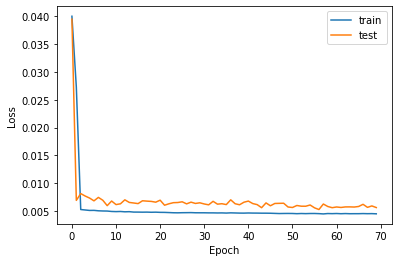

==============minmax===================
MAPE test is : 7548613222.33750
MAPE test invert is : 0.04566
==============zscore===================
MAPE test is : 0.16883
MAPE test invert is : 0.04872
RMSE Testing is : 0.075
RMSE Testing invert is : 1723.659
R2 test is : 0.85798


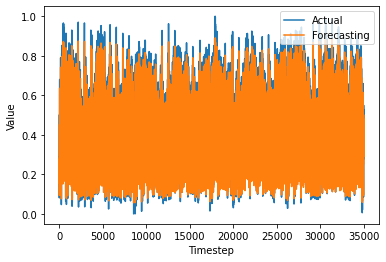

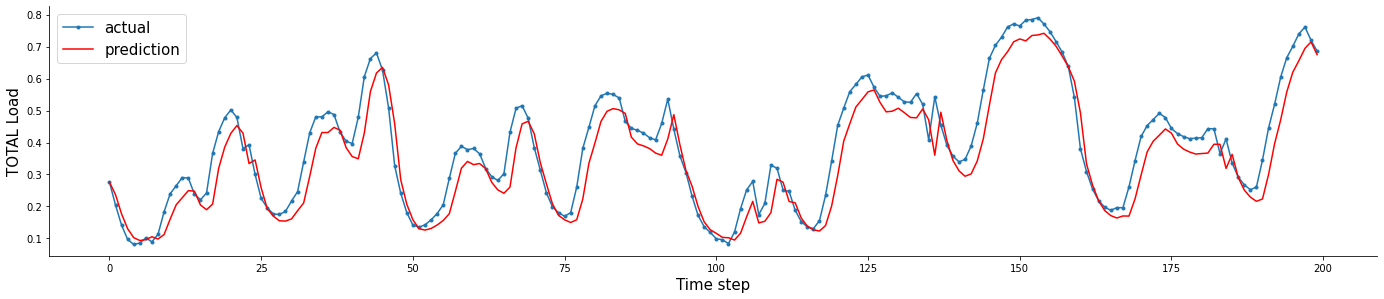

Epoch 1/70
36/36 [==============================] - 33s 213ms/step - loss: 0.0401 - val_loss: 0.0395
Epoch 2/70
36/36 [==============================] - 5s 140ms/step - loss: 0.0288 - val_loss: 0.0076
Epoch 3/70
36/36 [==============================] - 5s 148ms/step - loss: 0.0053 - val_loss: 0.0080
Epoch 4/70
36/36 [==============================] - 5s 130ms/step - loss: 0.0052 - val_loss: 0.0067
Epoch 5/70
36/36 [==============================] - 6s 158ms/step - loss: 0.0051 - val_loss: 0.0076
Epoch 6/70
36/36 [==============================] - 5s 130ms/step - loss: 0.0051 - val_loss: 0.0072
Epoch 7/70
36/36 [==============================] - 6s 156ms/step - loss: 0.0050 - val_loss: 0.0065
Epoch 8/70
36/36 [==============================] - 5s 144ms/step - loss: 0.0050 - val_loss: 0.0071
Epoch 9/70
36/36 [==============================] - 8s 214ms/step - loss: 0.0050 - val_loss: 0.0066
Epoch 10/70
36/36 [==============================] - 5s 143ms/step - loss: 0.0049 - val_loss: 0.007

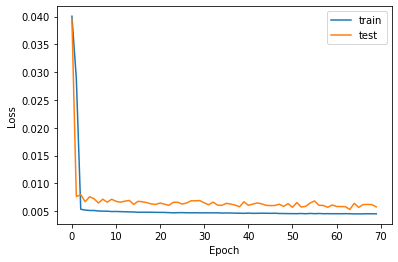

==============minmax===================
MAPE test is : 6784964962.04677
MAPE test invert is : 0.04630
==============zscore===================
MAPE test is : 0.17678
MAPE test invert is : 0.04956
RMSE Testing is : 0.076
RMSE Testing invert is : 1745.063
R2 test is : 0.85444


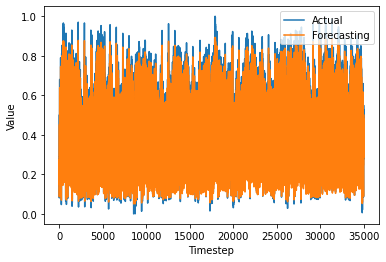

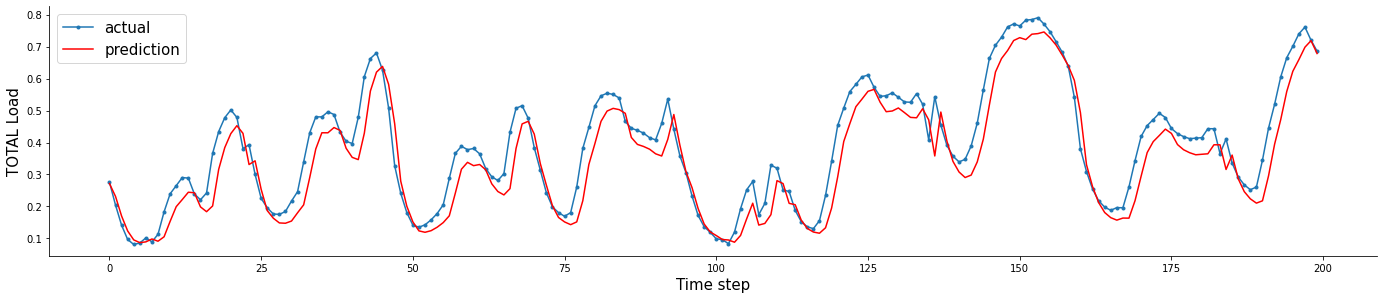

Epoch 1/70
36/36 [==============================] - 28s 173ms/step - loss: 0.0401 - val_loss: 0.0396
Epoch 2/70
36/36 [==============================] - 5s 147ms/step - loss: 0.0320 - val_loss: 0.0095
Epoch 3/70
36/36 [==============================] - 4s 125ms/step - loss: 0.0056 - val_loss: 0.0069
Epoch 4/70
36/36 [==============================] - 6s 157ms/step - loss: 0.0052 - val_loss: 0.0065
Epoch 5/70
36/36 [==============================] - 5s 142ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 6/70
36/36 [==============================] - 4s 125ms/step - loss: 0.0051 - val_loss: 0.0063
Epoch 7/70
36/36 [==============================] - 5s 148ms/step - loss: 0.0050 - val_loss: 0.0066
Epoch 8/70
36/36 [==============================] - 4s 123ms/step - loss: 0.0050 - val_loss: 0.0063
Epoch 9/70
36/36 [==============================] - 5s 137ms/step - loss: 0.0050 - val_loss: 0.0069
Epoch 10/70
36/36 [==============================] - 5s 134ms/step - loss: 0.0049 - val_loss: 0.007

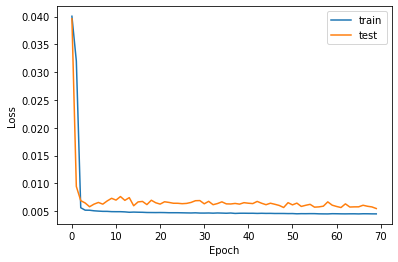

==============minmax===================
MAPE test is : 7258684429.62650
MAPE test invert is : 0.04501
==============zscore===================
MAPE test is : 0.16785
MAPE test invert is : 0.04797
RMSE Testing is : 0.074
RMSE Testing invert is : 1702.447
R2 test is : 0.86146


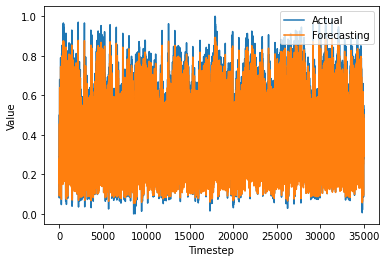

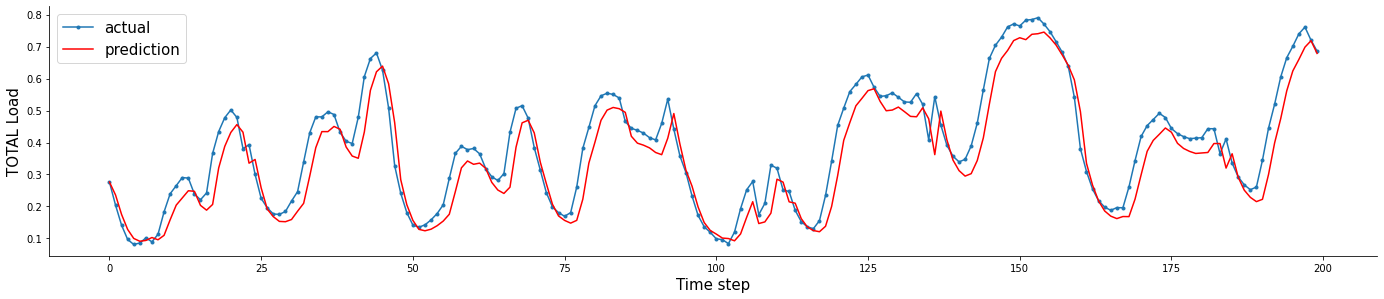

Epoch 1/70
36/36 [==============================] - 29s 187ms/step - loss: 0.0401 - val_loss: 0.0396
Epoch 2/70
36/36 [==============================] - 5s 146ms/step - loss: 0.0329 - val_loss: 0.0111
Epoch 3/70
36/36 [==============================] - 5s 139ms/step - loss: 0.0059 - val_loss: 0.0073
Epoch 4/70
36/36 [==============================] - 4s 125ms/step - loss: 0.0053 - val_loss: 0.0064
Epoch 5/70
36/36 [==============================] - 6s 164ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 6/70
36/36 [==============================] - 5s 140ms/step - loss: 0.0051 - val_loss: 0.0063
Epoch 7/70
36/36 [==============================] - 6s 179ms/step - loss: 0.0050 - val_loss: 0.0069
Epoch 8/70
36/36 [==============================] - 5s 127ms/step - loss: 0.0050 - val_loss: 0.0068
Epoch 9/70
36/36 [==============================] - 6s 157ms/step - loss: 0.0050 - val_loss: 0.0062
Epoch 10/70
36/36 [==============================] - 5s 143ms/step - loss: 0.0050 - val_loss: 0.006

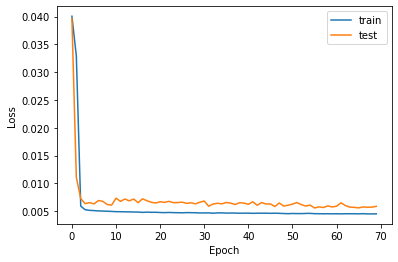

==============minmax===================
MAPE test is : 6912861938.02377
MAPE test invert is : 0.04684
==============zscore===================
MAPE test is : 0.17814
MAPE test invert is : 0.05016
RMSE Testing is : 0.077
RMSE Testing invert is : 1758.620
R2 test is : 0.85217


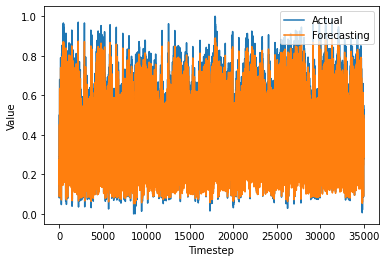

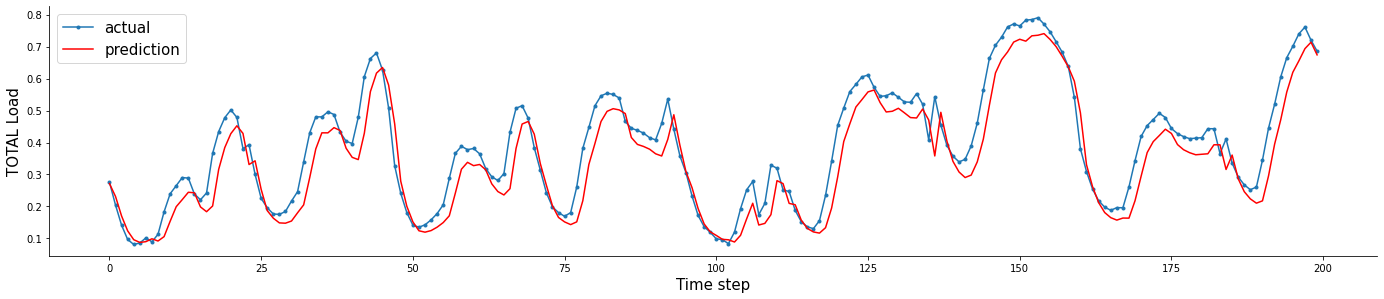

0                     1                    2  \
0     6781536188,927685     7548613222,337497    6784964962,046769   
1  0,048604161938311394    0,0456574556389365  0,04630476886584231   
2    0,1895702909278608   0,16882660407795452  0,17678430231911896   
3  0,052304052276359564  0,048722702647711925  0,04955737827121604   
4   0.07906244554304721   0.07502651698833124  0.07595815591012267   
5     1816,380623905967     1723,659201289922   1745,0626738791582   
6    0,8422950854099577    0,8579849697023384   0,8544361394502838   
7                   424                   406                  408   

                     3                    4           nama  
0    7258684429,626496    6912861938,023767        mminmax  
1  0,04500822692033393   0,0468418572656759  minmax invert  
2   0,1678451018353456  0,17814257865159716         zscore  
3  0,04796751391851328  0,05015674000831655  zscpre invert  
4  0.07410318901196511  0.07654829367235312           rmse  
5   1702,4466643608869   1758,6204988286413    rmse invert  
6   0,8614589303652307   0,8521655095301707             r2  
7                  366                  404          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto6
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(79, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=70, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start
  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto6") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]


  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto6")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto6")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig minmax

Epoch 1/70
36/36 [==============================] - 44s 214ms/step - loss: 0.0422 - val_loss: 0.0397
Epoch 2/70
36/36 [==============================] - 4s 122ms/step - loss: 0.0418 - val_loss: 0.0397
Epoch 3/70
36/36 [==============================] - 5s 134ms/step - loss: 0.0416 - val_loss: 0.0397
Epoch 4/70
36/36 [==============================] - 6s 155ms/step - loss: 0.0414 - val_loss: 0.0396
Epoch 5/70
36/36 [==============================] - 4s 118ms/step - loss: 0.0413 - val_loss: 0.0397
Epoch 6/70
36/36 [==============================] - 7s 195ms/step - loss: 0.0412 - val_loss: 0.0396
Epoch 7/70
36/36 [==============================] - 4s 121ms/step - loss: 0.0410 - val_loss: 0.0397
Epoch 8/70
36/36 [==============================] - 4s 118ms/step - loss: 0.0409 - val_loss: 0.0397
Epoch 9/70
36/36 [==============================] - 6s 155ms/step - loss: 0.0408 - val_loss: 0.0397
Epoch 10/70
36/36 [==============================] - 5s 130ms/step - loss: 0.0407 - val_loss: 0.039

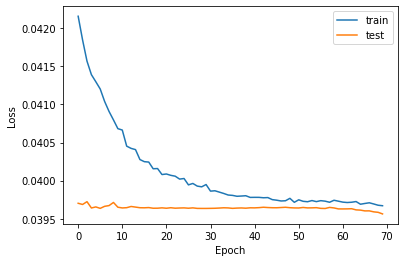

==============minmax===================
MAPE test is : 60094397459.71124
MAPE test invert is : 0.14156
==============zscore===================
MAPE test is : 0.36227
MAPE test invert is : 0.13521
RMSE Testing is : 0.199
RMSE Testing invert is : 4569.665
R2 test is : 0.00184


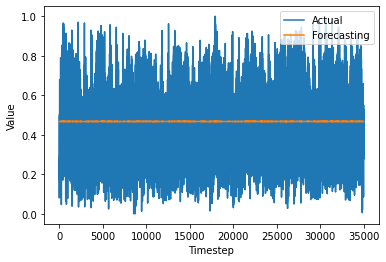

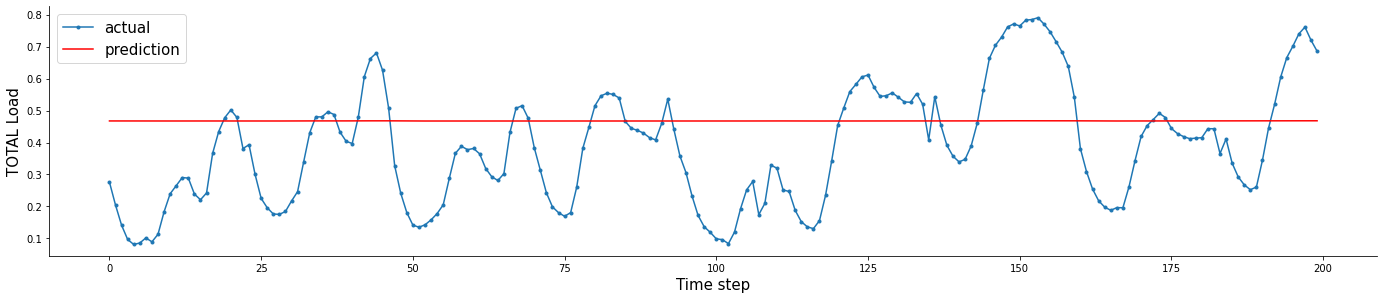

Epoch 1/70
36/36 [==============================] - 29s 207ms/step - loss: 0.0423 - val_loss: 0.0397
Epoch 2/70
36/36 [==============================] - 4s 121ms/step - loss: 0.0423 - val_loss: 0.0397
Epoch 3/70
36/36 [==============================] - 4s 120ms/step - loss: 0.0419 - val_loss: 0.0397
Epoch 4/70
36/36 [==============================] - 5s 146ms/step - loss: 0.0416 - val_loss: 0.0397
Epoch 5/70
36/36 [==============================] - 4s 121ms/step - loss: 0.0416 - val_loss: 0.0396
Epoch 6/70
36/36 [==============================] - 5s 145ms/step - loss: 0.0414 - val_loss: 0.0396
Epoch 7/70
36/36 [==============================] - 4s 122ms/step - loss: 0.0411 - val_loss: 0.0397
Epoch 8/70
36/36 [==============================] - 5s 134ms/step - loss: 0.0410 - val_loss: 0.0397
Epoch 9/70
36/36 [==============================] - 5s 146ms/step - loss: 0.0409 - val_loss: 0.0397
Epoch 10/70
36/36 [==============================] - 6s 156ms/step - loss: 0.0407 - val_loss: 0.039

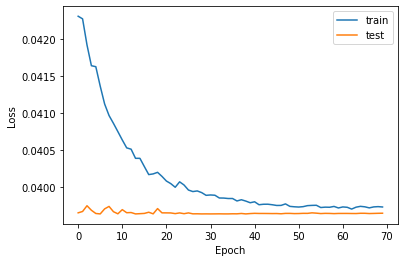

==============minmax===================
MAPE test is : 60058002811.11278
MAPE test invert is : 0.14164
==============zscore===================
MAPE test is : 0.36332
MAPE test invert is : 0.13545
RMSE Testing is : 0.199
RMSE Testing invert is : 4574.413
R2 test is : -0.00024


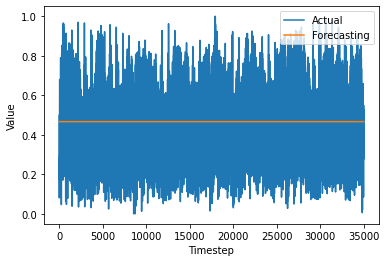

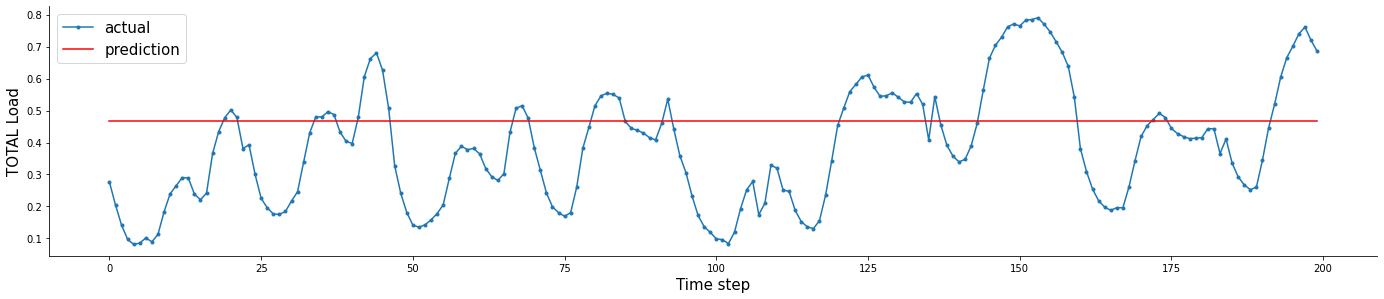

Epoch 1/70
36/36 [==============================] - 29s 197ms/step - loss: 0.0424 - val_loss: 0.0396
Epoch 2/70
36/36 [==============================] - 4s 126ms/step - loss: 0.0419 - val_loss: 0.0396
Epoch 3/70
36/36 [==============================] - 5s 138ms/step - loss: 0.0418 - val_loss: 0.0397
Epoch 4/70
36/36 [==============================] - 5s 134ms/step - loss: 0.0415 - val_loss: 0.0397
Epoch 5/70
36/36 [==============================] - 4s 123ms/step - loss: 0.0414 - val_loss: 0.0397
Epoch 6/70
36/36 [==============================] - 5s 149ms/step - loss: 0.0412 - val_loss: 0.0396
Epoch 7/70
36/36 [==============================] - 4s 126ms/step - loss: 0.0410 - val_loss: 0.0397
Epoch 8/70
36/36 [==============================] - 5s 137ms/step - loss: 0.0410 - val_loss: 0.0396
Epoch 9/70
36/36 [==============================] - 5s 134ms/step - loss: 0.0408 - val_loss: 0.0397
Epoch 10/70
36/36 [==============================] - 4s 124ms/step - loss: 0.0407 - val_loss: 0.039

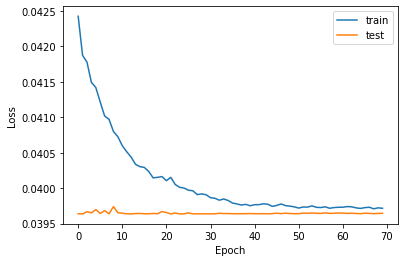

==============minmax===================
MAPE test is : 60045227108.50744
MAPE test invert is : 0.14163
==============zscore===================
MAPE test is : 0.36340
MAPE test invert is : 0.13547
RMSE Testing is : 0.199
RMSE Testing invert is : 4574.379
R2 test is : -0.00022


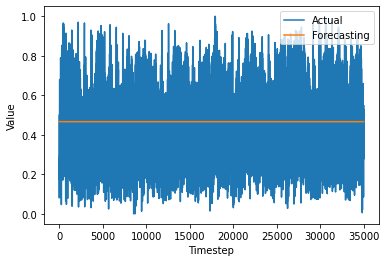

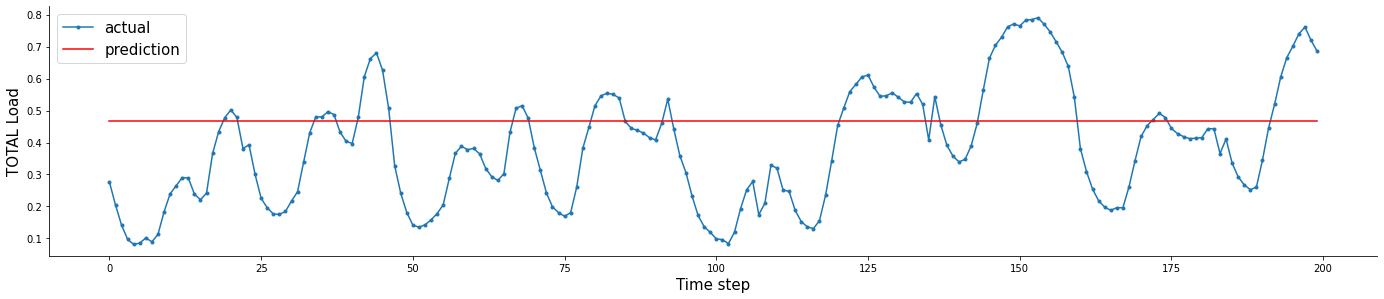

Epoch 1/70
36/36 [==============================] - 31s 234ms/step - loss: 0.0426 - val_loss: 0.0396
Epoch 2/70
36/36 [==============================] - 5s 140ms/step - loss: 0.0422 - val_loss: 0.0398
Epoch 3/70
36/36 [==============================] - 6s 178ms/step - loss: 0.0419 - val_loss: 0.0397
Epoch 4/70
36/36 [==============================] - 5s 129ms/step - loss: 0.0418 - val_loss: 0.0397
Epoch 5/70
36/36 [==============================] - 5s 140ms/step - loss: 0.0416 - val_loss: 0.0397
Epoch 6/70
36/36 [==============================] - 5s 142ms/step - loss: 0.0413 - val_loss: 0.0396
Epoch 7/70
36/36 [==============================] - 5s 126ms/step - loss: 0.0412 - val_loss: 0.0396
Epoch 8/70
36/36 [==============================] - 6s 167ms/step - loss: 0.0411 - val_loss: 0.0396
Epoch 9/70
36/36 [==============================] - 5s 132ms/step - loss: 0.0409 - val_loss: 0.0396
Epoch 10/70
36/36 [==============================] - 6s 157ms/step - loss: 0.0409 - val_loss: 0.039

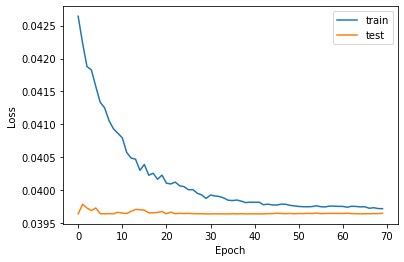

==============minmax===================
MAPE test is : 60069137457.08096
MAPE test invert is : 0.14165
==============zscore===================
MAPE test is : 0.36325
MAPE test invert is : 0.13544
RMSE Testing is : 0.199
RMSE Testing invert is : 4574.444
R2 test is : -0.00025


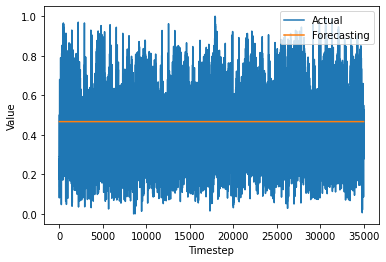

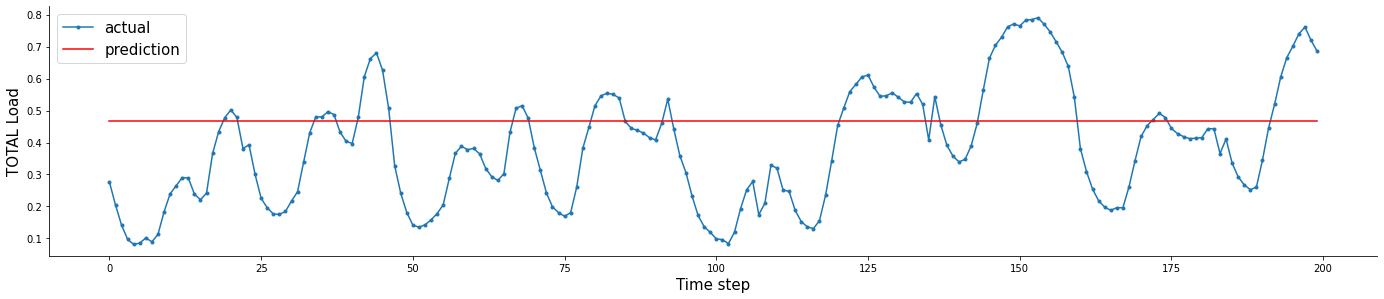

Epoch 1/70
36/36 [==============================] - 29s 184ms/step - loss: 0.0427 - val_loss: 0.0397
Epoch 2/70
36/36 [==============================] - 6s 158ms/step - loss: 0.0419 - val_loss: 0.0398
Epoch 3/70
36/36 [==============================] - 5s 130ms/step - loss: 0.0419 - val_loss: 0.0397
Epoch 4/70
36/36 [==============================] - 5s 154ms/step - loss: 0.0416 - val_loss: 0.0396
Epoch 5/70
36/36 [==============================] - 5s 133ms/step - loss: 0.0413 - val_loss: 0.0397
Epoch 6/70
36/36 [==============================] - 5s 146ms/step - loss: 0.0415 - val_loss: 0.0397
Epoch 7/70
36/36 [==============================] - 6s 159ms/step - loss: 0.0411 - val_loss: 0.0396
Epoch 8/70
36/36 [==============================] - 5s 143ms/step - loss: 0.0411 - val_loss: 0.0396
Epoch 9/70
36/36 [==============================] - 6s 170ms/step - loss: 0.0409 - val_loss: 0.0397
Epoch 10/70
36/36 [==============================] - 5s 130ms/step - loss: 0.0409 - val_loss: 0.039

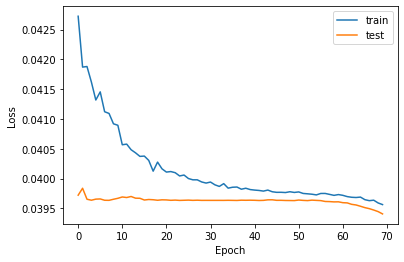

==============minmax===================
MAPE test is : 59920959244.93011
MAPE test invert is : 0.14125
==============zscore===================
MAPE test is : 0.36196
MAPE test invert is : 0.13501
RMSE Testing is : 0.199
RMSE Testing invert is : 4560.719
R2 test is : 0.00574


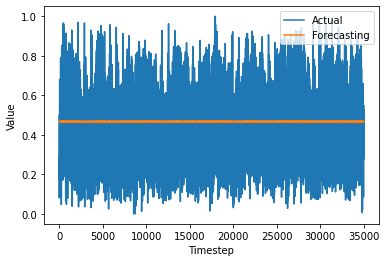

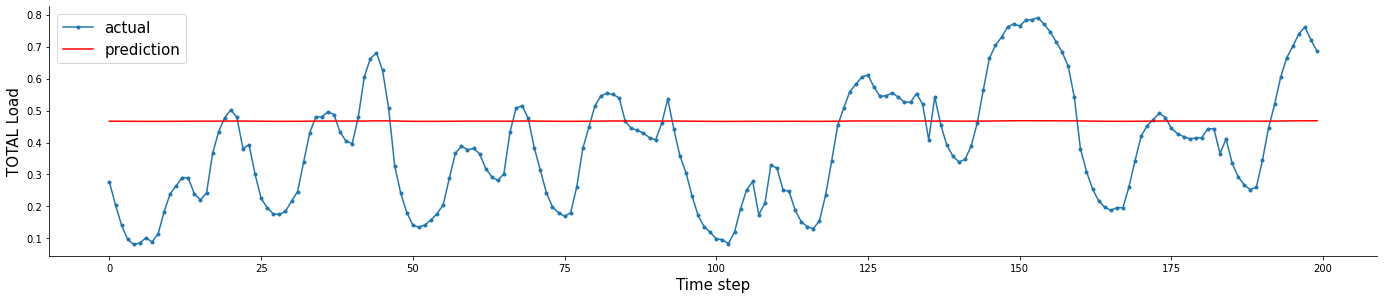

0                        1                       2  \
0     60094397459,711235        60058002811,11278       60045227108,50744   
1    0,14156187516317267      0,14163733028437983     0,14162745998426754   
2     0,3622688507568819      0,36331606785451714     0,36339709022374295   
3    0,13520782674382265      0,13545349209194746     0,13546561126915008   
4    0.19890594450448018      0.19911262303105656      0.1991111472936173   
5      4569,665169045927        4574,413401515493      4574,3794979235645   
6  0,0018397625330039968  -0,00023564519349394963  -0,0002208186124652567   
7                    419                      403                     404   

                        3                    4           nama  
0      60069137457,080956    59920959244,93011        mminmax  
1     0,14164594900232172    0,141245420929684  minmax invert  
2     0,36324556573203975   0,3619648093204002         zscore  
3     0,13544295575663814  0,13500782748328505  zscpre invert  
4     0.19911395857758074  0.19851653254606955           rmse  
5        4574,44408436134    4560,718818713401    rmse invert  
6  -0,0002490633856622182  0,00574427172954739             r2  
7                     404                  404          waktu

In [20]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto7
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(79, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=70, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto7") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto7")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto7")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc

## sig zscore

Epoch 1/70
36/36 [==============================] - 32s 225ms/step - loss: 1.0874 - val_loss: 1.0109
Epoch 2/70
36/36 [==============================] - 5s 128ms/step - loss: 1.0053 - val_loss: 1.0002
Epoch 3/70
36/36 [==============================] - 6s 168ms/step - loss: 1.0007 - val_loss: 0.9995
Epoch 4/70
36/36 [==============================] - 5s 141ms/step - loss: 0.9998 - val_loss: 0.9991
Epoch 5/70
36/36 [==============================] - 7s 199ms/step - loss: 0.9996 - val_loss: 0.9987
Epoch 6/70
36/36 [==============================] - 5s 128ms/step - loss: 0.9992 - val_loss: 0.9984
Epoch 7/70
36/36 [==============================] - 5s 141ms/step - loss: 0.9989 - val_loss: 0.9977
Epoch 8/70
36/36 [==============================] - 6s 165ms/step - loss: 0.9985 - val_loss: 0.9969
Epoch 9/70
36/36 [==============================] - 5s 126ms/step - loss: 0.9975 - val_loss: 0.9961
Epoch 10/70
36/36 [==============================] - 6s 179ms/step - loss: 0.9969 - val_loss: 0.994

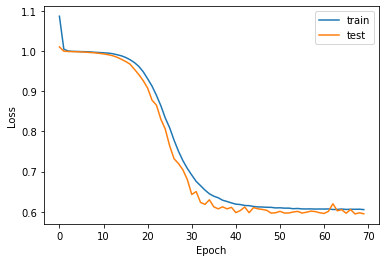

==============minmax===================
MAPE test is : 2.17987
MAPE test invert is : 0.10824
==============zscore===================
MAPE test is : 490.47171
MAPE test invert is : 0.09302
RMSE Testing is : 0.771
RMSE Testing invert is : 3528.352
R2 test is : 0.40492


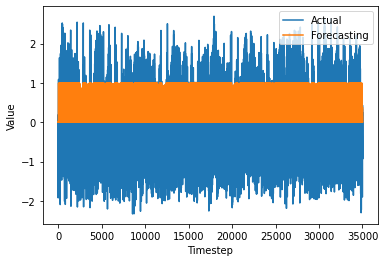

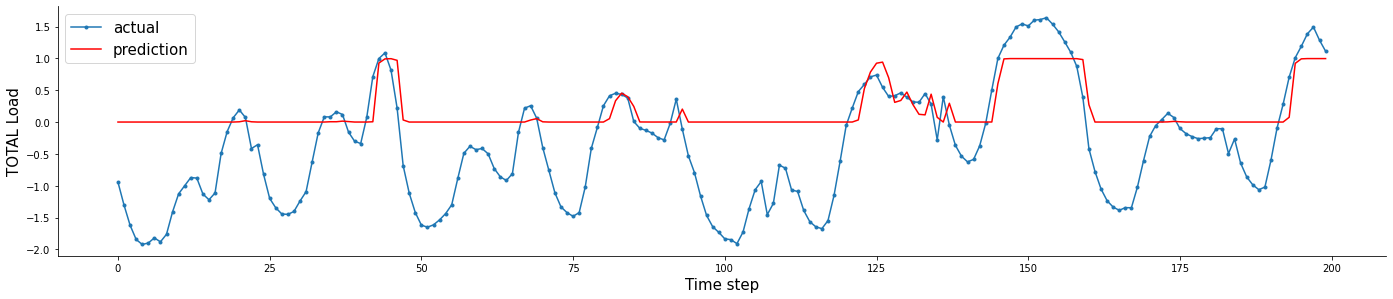

Epoch 1/70
36/36 [==============================] - 32s 233ms/step - loss: 1.1282 - val_loss: 1.0105
Epoch 2/70
36/36 [==============================] - 5s 145ms/step - loss: 1.0051 - val_loss: 1.0003
Epoch 3/70
36/36 [==============================] - 8s 210ms/step - loss: 1.0006 - val_loss: 0.9995
Epoch 4/70
36/36 [==============================] - 5s 133ms/step - loss: 0.9999 - val_loss: 0.9991
Epoch 5/70
36/36 [==============================] - 6s 179ms/step - loss: 0.9994 - val_loss: 0.9986
Epoch 6/70
36/36 [==============================] - 5s 132ms/step - loss: 0.9992 - val_loss: 0.9979
Epoch 7/70
36/36 [==============================] - 5s 146ms/step - loss: 0.9986 - val_loss: 0.9972
Epoch 8/70
36/36 [==============================] - 6s 170ms/step - loss: 0.9979 - val_loss: 0.9963
Epoch 9/70
36/36 [==============================] - 5s 133ms/step - loss: 0.9974 - val_loss: 0.9953
Epoch 10/70
36/36 [==============================] - 6s 171ms/step - loss: 0.9967 - val_loss: 0.993

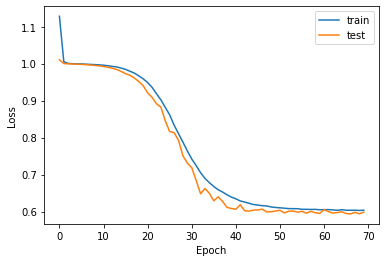

==============minmax===================
MAPE test is : 2.90754
MAPE test invert is : 0.10894
==============zscore===================
MAPE test is : 514.25166
MAPE test invert is : 0.09340
RMSE Testing is : 0.774
RMSE Testing invert is : 3539.093
R2 test is : 0.40129


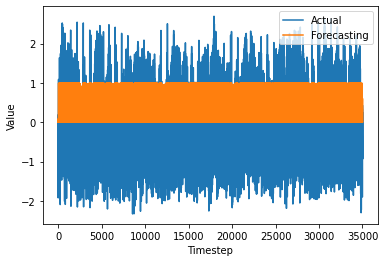

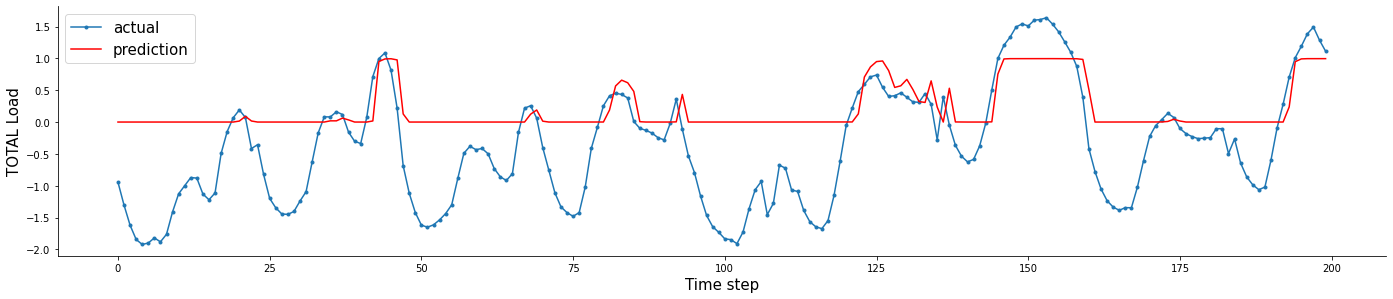

Epoch 1/70
36/36 [==============================] - 31s 214ms/step - loss: 1.0955 - val_loss: 1.0107
Epoch 2/70
36/36 [==============================] - 5s 127ms/step - loss: 1.0055 - val_loss: 1.0002
Epoch 3/70
36/36 [==============================] - 6s 181ms/step - loss: 1.0004 - val_loss: 0.9996
Epoch 4/70
36/36 [==============================] - 6s 178ms/step - loss: 1.0000 - val_loss: 0.9992
Epoch 5/70
36/36 [==============================] - 7s 190ms/step - loss: 0.9998 - val_loss: 0.9988
Epoch 6/70
36/36 [==============================] - 5s 126ms/step - loss: 0.9996 - val_loss: 0.9983
Epoch 7/70
36/36 [==============================] - 5s 140ms/step - loss: 0.9989 - val_loss: 0.9978
Epoch 8/70
36/36 [==============================] - 6s 166ms/step - loss: 0.9984 - val_loss: 0.9971
Epoch 9/70
36/36 [==============================] - 5s 128ms/step - loss: 0.9980 - val_loss: 0.9963
Epoch 10/70
36/36 [==============================] - 6s 165ms/step - loss: 0.9972 - val_loss: 0.995

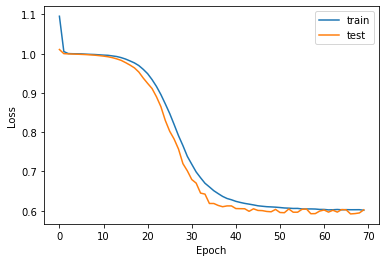

==============minmax===================
MAPE test is : 3.30802
MAPE test invert is : 0.10970
==============zscore===================
MAPE test is : 331.52776
MAPE test invert is : 0.09394
RMSE Testing is : 0.776
RMSE Testing invert is : 3550.256
R2 test is : 0.39751


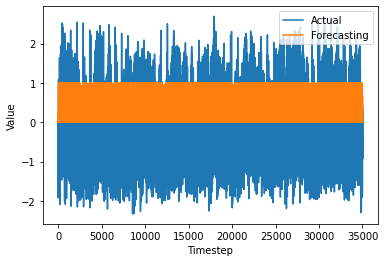

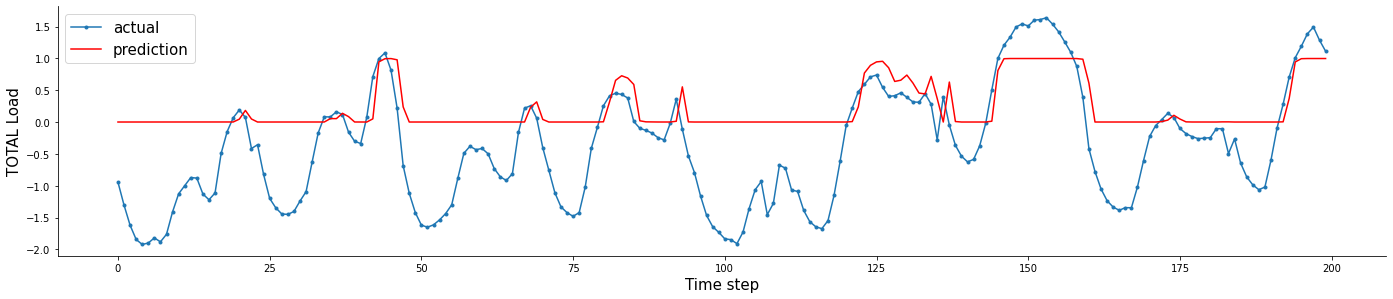

Epoch 1/70
36/36 [==============================] - 32s 242ms/step - loss: 1.0771 - val_loss: 1.0087
Epoch 2/70
36/36 [==============================] - 5s 141ms/step - loss: 1.0048 - val_loss: 1.0002
Epoch 3/70
36/36 [==============================] - 5s 129ms/step - loss: 1.0004 - val_loss: 0.9994
Epoch 4/70
36/36 [==============================] - 6s 161ms/step - loss: 0.9998 - val_loss: 0.9992
Epoch 5/70
36/36 [==============================] - 5s 127ms/step - loss: 0.9996 - val_loss: 0.9989
Epoch 6/70
36/36 [==============================] - 6s 166ms/step - loss: 0.9992 - val_loss: 0.9986
Epoch 7/70
36/36 [==============================] - 5s 127ms/step - loss: 0.9989 - val_loss: 0.9981
Epoch 8/70
36/36 [==============================] - 5s 141ms/step - loss: 0.9987 - val_loss: 0.9974
Epoch 9/70
36/36 [==============================] - 6s 160ms/step - loss: 0.9978 - val_loss: 0.9964
Epoch 10/70
36/36 [==============================] - 5s 141ms/step - loss: 0.9973 - val_loss: 0.995

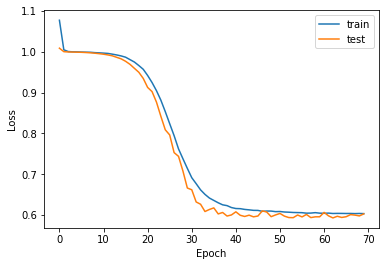

==============minmax===================
MAPE test is : 1.04627
MAPE test invert is : 0.10969
==============zscore===================
MAPE test is : 909.73337
MAPE test invert is : 0.09538
RMSE Testing is : 0.776
RMSE Testing invert is : 3552.054
R2 test is : 0.39690


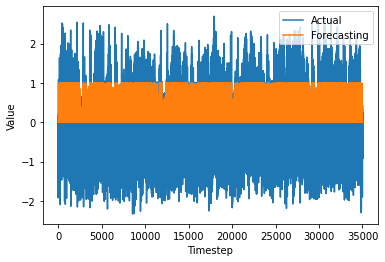

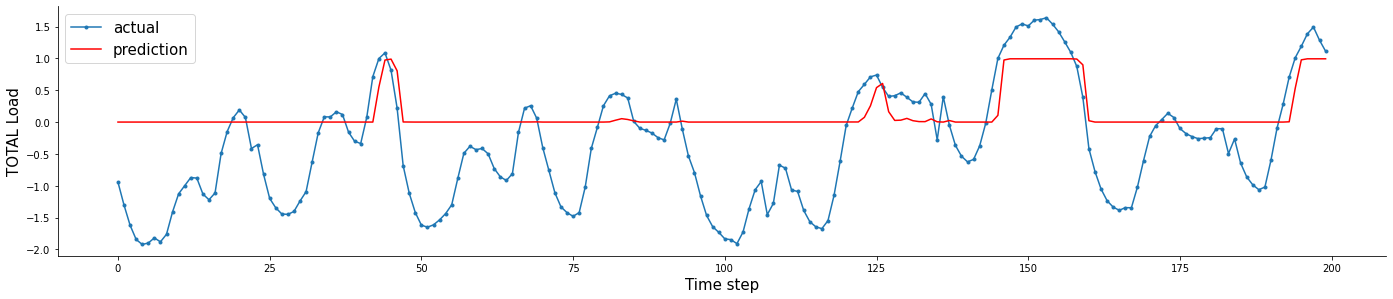

Epoch 1/70
36/36 [==============================] - 29s 182ms/step - loss: 1.0480 - val_loss: 1.0070
Epoch 2/70
36/36 [==============================] - 5s 144ms/step - loss: 1.0043 - val_loss: 1.0004
Epoch 3/70
36/36 [==============================] - 5s 142ms/step - loss: 1.0005 - val_loss: 0.9994
Epoch 4/70
36/36 [==============================] - 5s 139ms/step - loss: 0.9998 - val_loss: 0.9992
Epoch 5/70
36/36 [==============================] - 6s 162ms/step - loss: 0.9995 - val_loss: 0.9990
Epoch 6/70
36/36 [==============================] - 4s 124ms/step - loss: 0.9992 - val_loss: 0.9987
Epoch 7/70
36/36 [==============================] - 5s 139ms/step - loss: 0.9989 - val_loss: 0.9982
Epoch 8/70
36/36 [==============================] - 5s 148ms/step - loss: 0.9986 - val_loss: 0.9976
Epoch 9/70
36/36 [==============================] - 4s 125ms/step - loss: 0.9980 - val_loss: 0.9969
Epoch 10/70
36/36 [==============================] - 6s 165ms/step - loss: 0.9975 - val_loss: 0.995

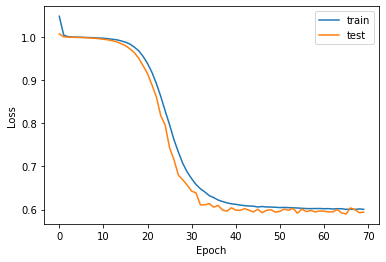

==============minmax===================
MAPE test is : 1.32933
MAPE test invert is : 0.10814
==============zscore===================
MAPE test is : 770.96227
MAPE test invert is : 0.09354
RMSE Testing is : 0.771
RMSE Testing invert is : 3526.281
R2 test is : 0.40562


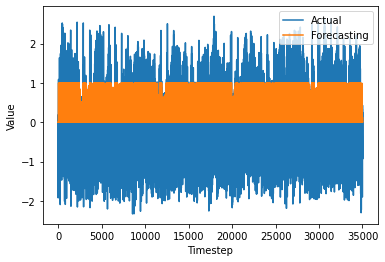

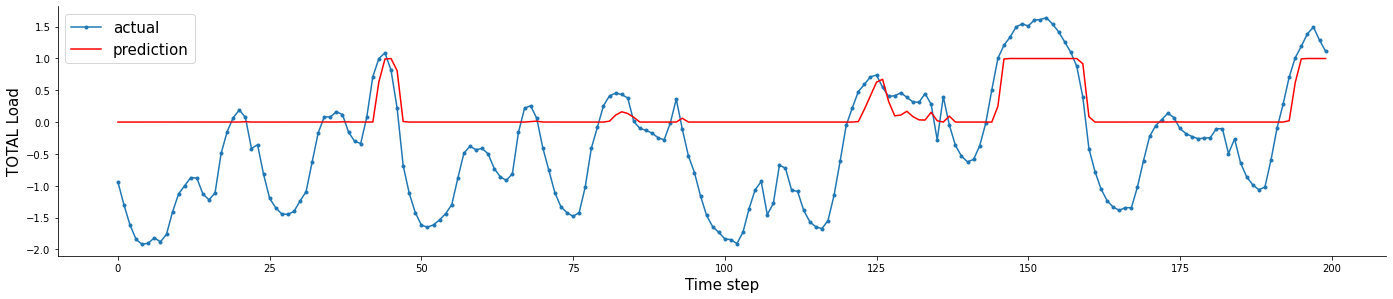

0                    1                    2  \
0   2,1798693062998615   2,9075398247244344   3,3080245882638493   
1  0,10823709733302517  0,10894151573917382  0,10970015074570706   
2   490,47170889570504    514,2516588128883    331,5277582290137   
3  0,09301921132669348  0,09339712659182366  0,09393548437365361   
4   0.7712375839478598    0.773585351282325   0.7760252895290283   
5   3528,3522873674633   3539,0931413107623    3550,255670047656   
6   0,4049199539885826     0,40129140674971   0,3975087194466278   
7                  406                  466                  406   

                     3                    4           nama  
0   1,0462702455226542    1,329331957125799        mminmax  
1  0,10969269118158549  0,10813655804331536  minmax invert  
2    909,7333660088052    770,9622737990911         zscore  
3   0,0953849083299259  0,09353534804660378  zscpre invert  
4   0.7764184528078405   0.7707847848727287           rmse  
5   3552,0543616350196   3526,2807666250765    rmse invert  
6   0,3968980758091629   0,4056185003290764             r2  
7                  405                  388          waktu

In [ ]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto8
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network LSTM
  model = Sequential()
  model.add(LSTM(79, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(LSTM(units = 79, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=70, batch_size=1000, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto8") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto8")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto8")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)

nama = ['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu']
dc['nama'] = nama
# print dataframe.
dc